# **Mobile Price Classification**

Group 18

18406, 18423, 18457

#Import required packages

In [ ]:
import pandas as pd
import numpy as np
from random import seed
from random import choice
from matplotlib import pyplot as plt
from plotnine import ggplot,aes,geom_line,ggtitle,xlab,ylab
from sklearn.preprocessing import MinMaxScaler
import math as m
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, accuracy_score, classification_report,mean_squared_error
import pickle
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
import seaborn as sns
import os
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz  
from IPython.display import Image
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


#Import dataset

In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
d

In [ ]:
df=pd.read_csv('/content/drive/My Drive/dataset/mobile_price_analysis_train.csv')
df.head(10)

battery_power blue  clock_speed  ... touch_screen  wifi price_range
0            842   no          2.2  ...           no   yes           1
1           1021  yes          0.5  ...          yes    no           2
2            563  yes          0.5  ...          yes    no           2
3            615  yes          2.5  ...           no    no           2
4           1821  yes          1.2  ...          yes    no           1
5           1859   no          0.5  ...           no    no           1
6           1821   no          1.7  ...           no   yes           3
7           1954   no          0.5  ...          yes   yes           0
8           1445  yes          0.5  ...           no    no           0
9            509  NaN          0.6  ...           no    no           0

[10 rows x 21 columns]

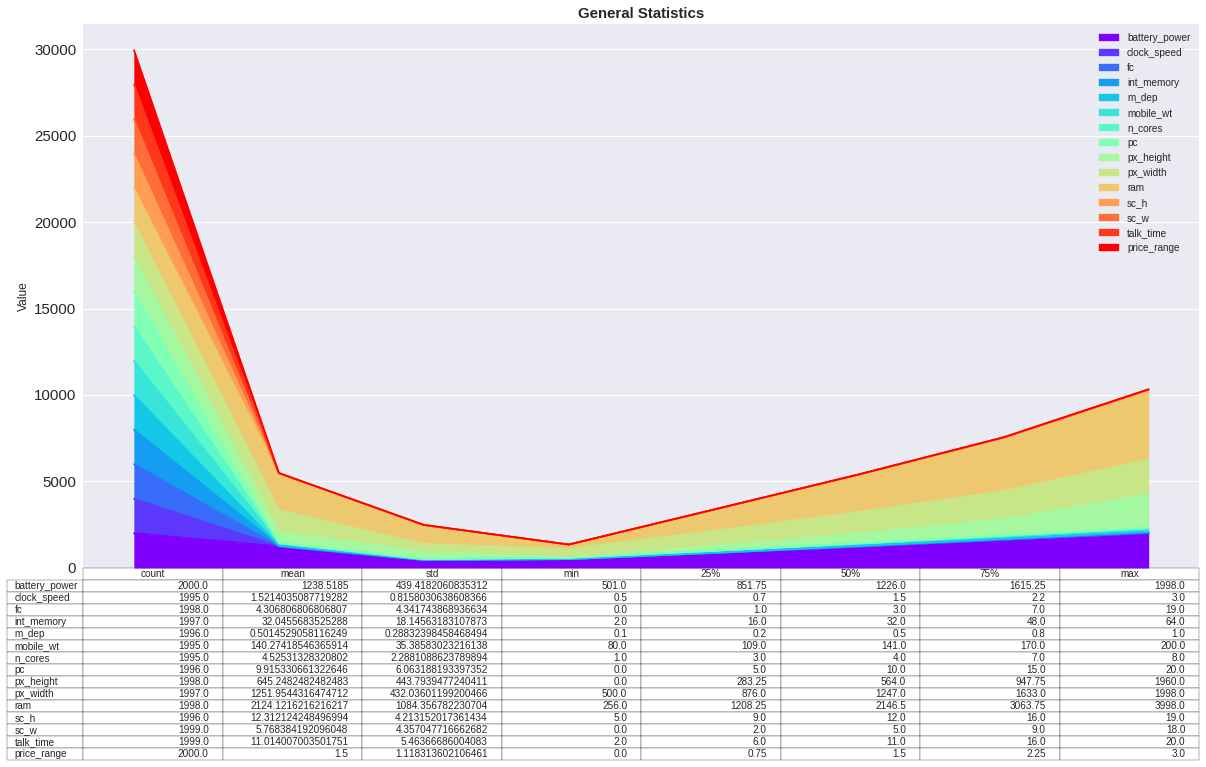

In [ ]:
frame1=df.describe().plot(kind = "area",fontsize=15, figsize = (20,10), table =True,colormap="rainbow",stacked=True)
plt.ylabel('Value',fontsize=12)
plt.title("General Statistics",fontweight='bold',fontsize=15)
frame1.axes.get_xaxis().set_visible(False)
plt.show()

**Find Shape of the csv file**

In [ ]:
df.shape

(2000, 21)

#**Exploratory Data Analysis**
The following steps are done to analyse the data.
1. Identification of variables and data types
2. Missing value treatment
3. Outlier treatment
4. Variable transformations
5. Correlation Analysis
6. Graphical Univariate Analysis
7. Bivariate Analysis




#Find the datatypes of the columns

In [ ]:
df.dtypes

battery_power      int64
blue              object
clock_speed      float64
dual_sim          object
fc               float64
four_g            object
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time        float64
three_g           object
touch_screen      object
wifi              object
price_range        int64
dtype: object

The categorical attributes are

1. Bluetooth
2. 4G
3. 3G
4. Touchscreen
5. Wifi
6. Dual Sim
7. Price Range which is the target class

#Imputation

In [ ]:
df.isnull().sum()

battery_power    0
blue             3
clock_speed      5
dual_sim         2
fc               2
four_g           1
int_memory       3
m_dep            4
mobile_wt        5
n_cores          5
pc               4
px_height        2
px_width         3
ram              2
sc_h             4
sc_w             1
talk_time        1
three_g          2
touch_screen     6
wifi             4
price_range      0
dtype: int64

There are 59 missing values

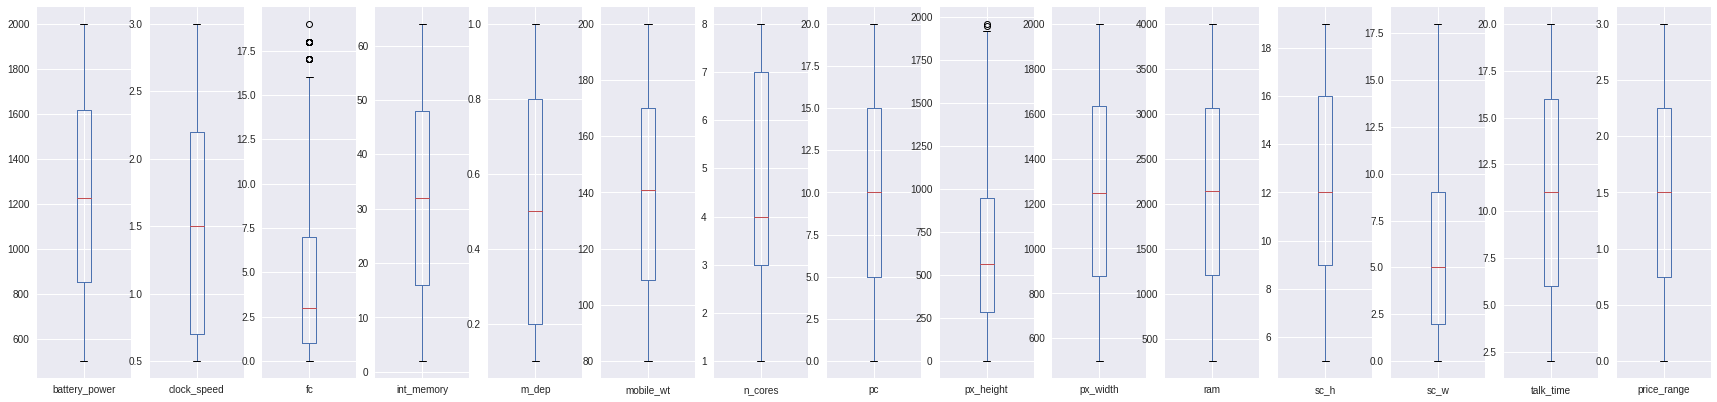

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,15), figsize=(30, 15));

In [ ]:
df["blue"].fillna(df["blue"].mode()[0], inplace = True)
df["dual_sim"].fillna(df["dual_sim"].mode()[0], inplace = True)
df["four_g"].fillna(df["four_g"].mode()[0], inplace = True)
df["three_g"].fillna(df["three_g"].mode()[0], inplace = True)
df["touch_screen"].fillna(df["touch_screen"].mode()[0], inplace = True)
df["wifi"].fillna(df["wifi"].mode()[0], inplace = True)
df["n_cores"].fillna(df["n_cores"].mode()[0], inplace = True)

Since most of the missing values are categorical values, they are filled by their frequency.

In [ ]:
df.fillna(df.mean(),inplace=True)

Since the numerical columns are under normal distribution fount from the box pkot, they are filled by their mean values.

In [ ]:
df.isnull().sum().sum()

0

Therefore missing values are treated.

#Encoding 

In [ ]:
le = LabelEncoder()
df["blue"] = le.fit_transform(df["blue"].astype(str))
df["dual_sim"] = le.fit_transform(df["dual_sim"].astype(str))
df["four_g"] = le.fit_transform(df["four_g"].astype(str))
df["three_g"] = le.fit_transform(df["three_g"].astype(str))
df["touch_screen"] = le.fit_transform(df["touch_screen"].astype(str))
df["wifi"] = le.fit_transform(df["wifi"].astype(str))

The object attributes are encoded to their numerical componenets with the target classes as 

* 0 - no
* 1- yes

In [ ]:
df.head(5)

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time        float64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

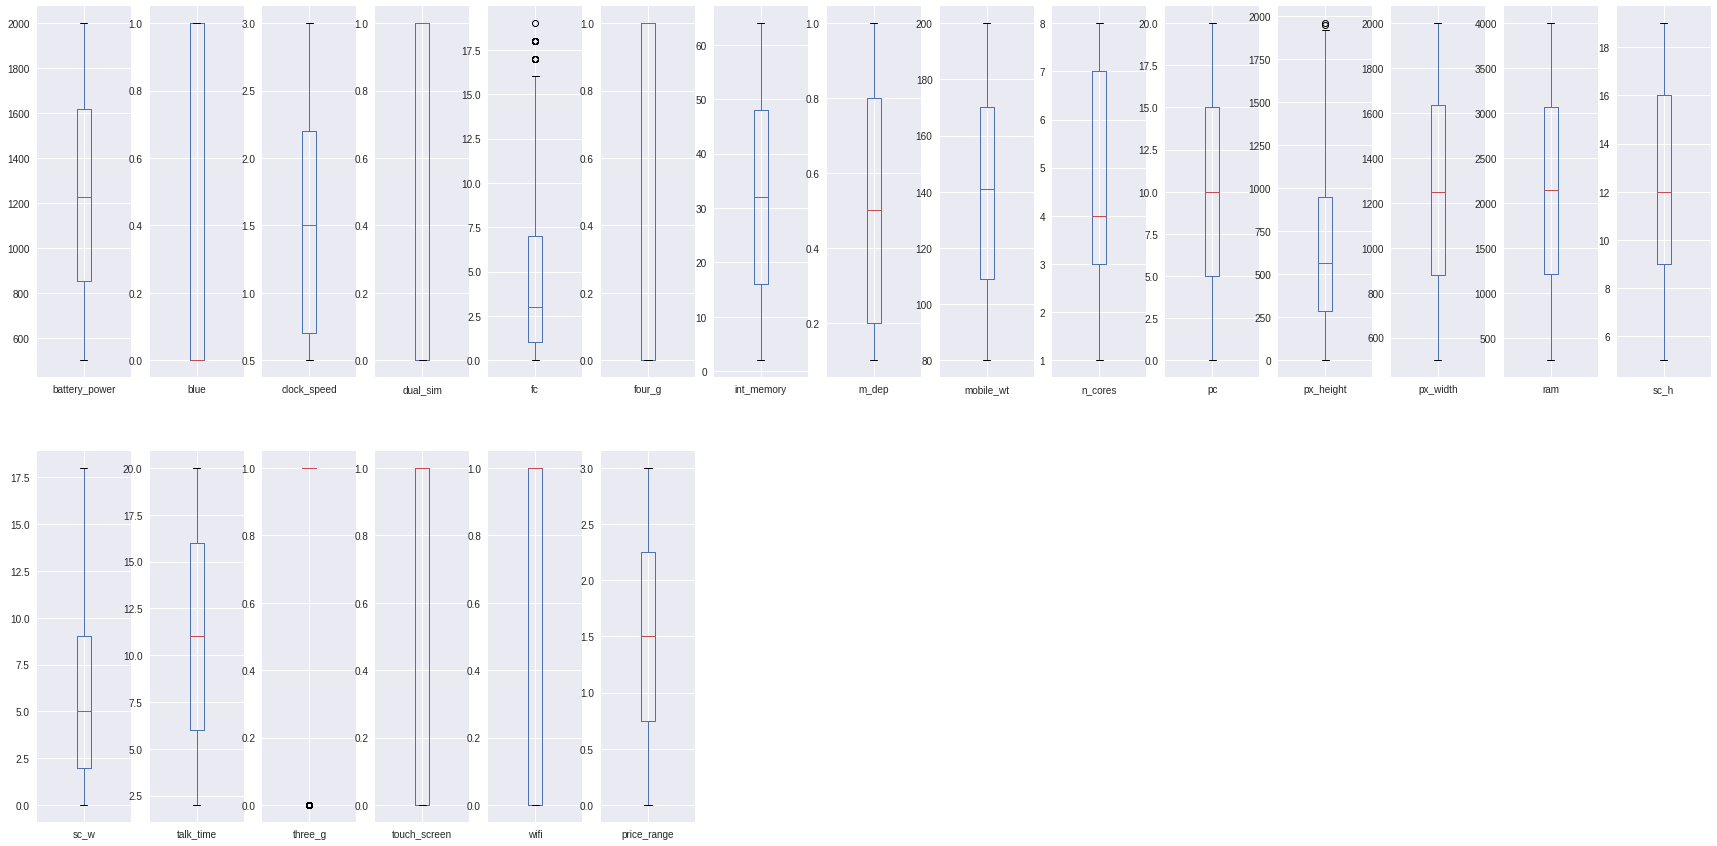

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,15), figsize=(30, 15));

Outliers are found in fc and px_height attributes. So, outlier treatment is implemented using the IQR method.

#Outlier Detection

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1- (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lowerbound,upperbound = outlier_treatment(df.fc)
df.loc[((df['fc']<lowerbound) | (df['fc']>upperbound)),'fc']=np.NaN

In [ ]:
lowerbound,upperbound = outlier_treatment(df.px_height)
df.loc[((df['px_height']<lowerbound) | (df['px_height']>upperbound)),'px_height']=np.NaN

In [ ]:
df.isnull().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc               18
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         2
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

* There are 18 outliers in fc attribute.
* There are 2 outliers in px_height attribute.

In [ ]:
df.fillna(df.mean(),inplace=True)

Those outliers are replaced by NaN values using Numpy package by their column mean since now they are under gaussian distribution as shown in the following boxplot.

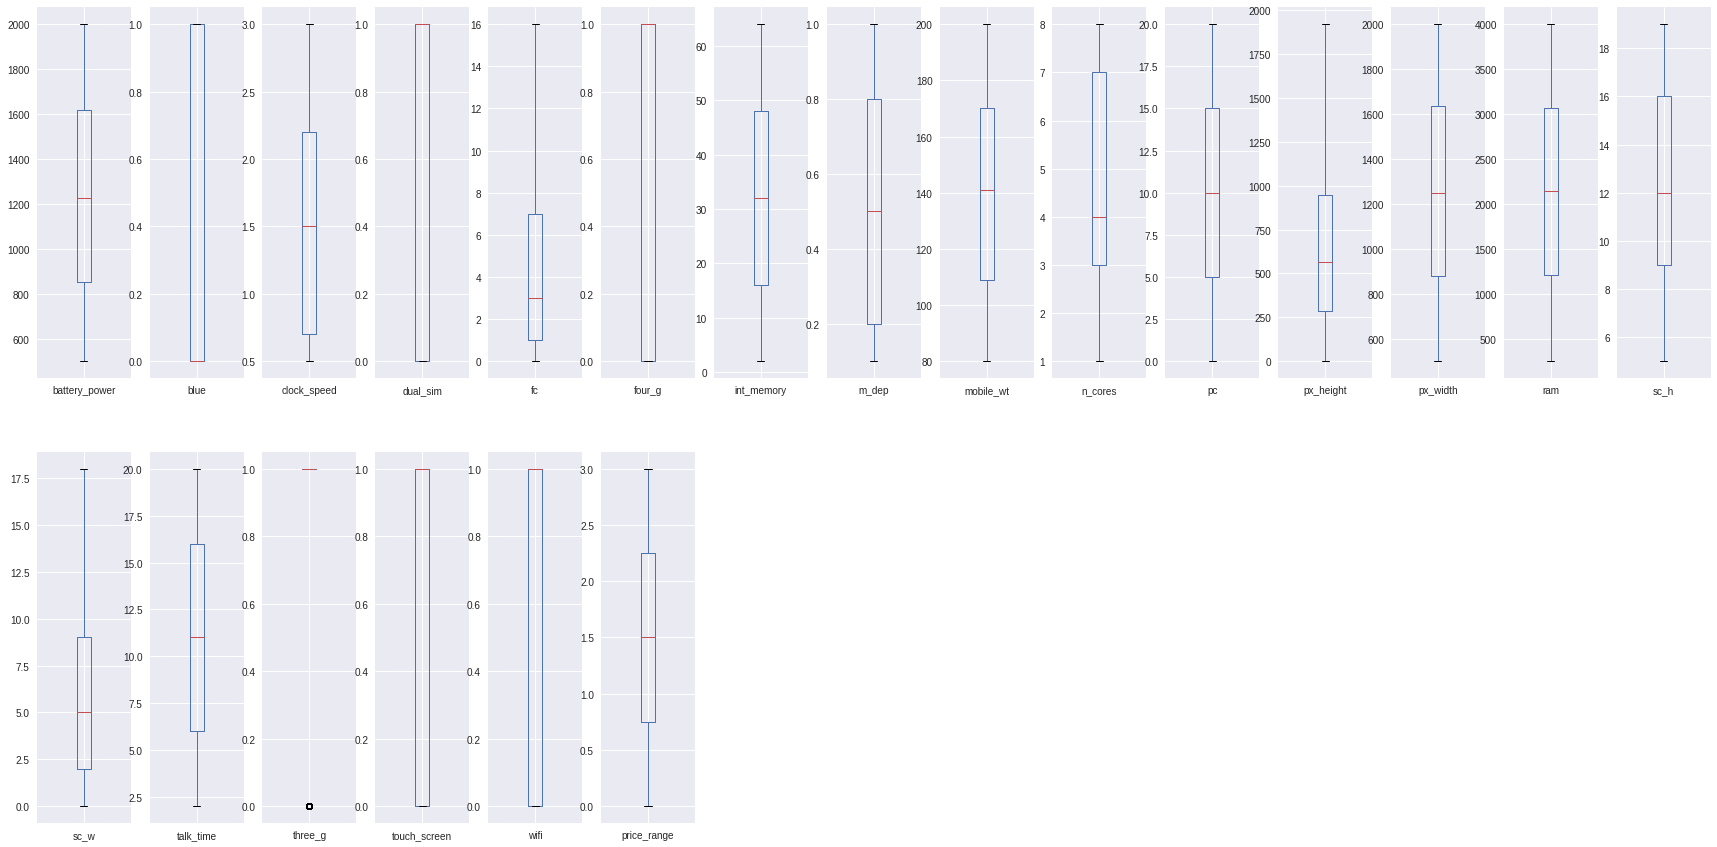

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,15), figsize=(30, 15));

#Normalaization

Outliers are treated before standardization because if not the resulting data wont be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1).

In [ ]:
x = df.values 
scaler = MinMaxScaler()
x_scaled =scaler.fit_transform(x)
df1= pd.DataFrame(x_scaled)
df1=df1.round(2)
df1.columns=df.columns
train=df1
train.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0           0.23   0.0         0.68  ...           0.0   1.0         0.33
1           0.35   1.0         0.00  ...           1.0   0.0         0.67
2           0.04   1.0         0.00  ...           1.0   0.0         0.67
3           0.08   1.0         0.80  ...           0.0   0.0         0.67
4           0.88   1.0         0.28  ...           1.0   0.0         0.33

[5 rows x 21 columns]

Since the attribues were ranged in different metrics, they are scaled to the range (0,1) using MinMaxScaler Package so as to get a better level of accuracy.

#Correlational Analysis

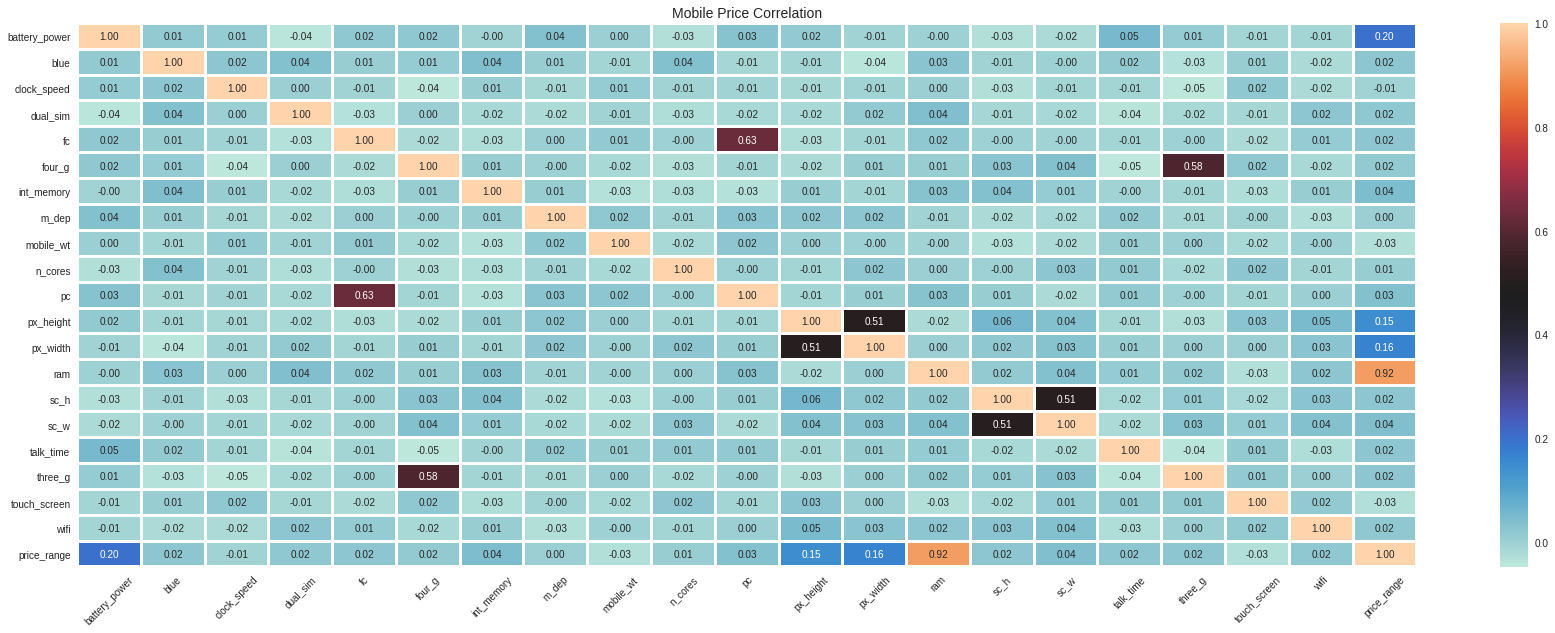

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Mobile Price Correlation', fontsize=14)
sns.heatmap(train.corr(),cmap='icefire',fmt='.2f',annot=True,linewidth=2)
plt.xticks(rotation=45)
plt.show()

#Inference:

1. Battery power, Pixel Resolution Height and Width have a positive corelation with Price Range.
2. RAM size strongly and positively influences price of the phone. If RAM size is large, then the price of the mobile will be higher.
3. Pixel Resolution Width and Height are positively corelated.
4. Front camera pixel and Primary camera pixel are strongly positively corelated.
5. 4G and 3G positively influence each other.
6. Number of processors has 0 corelation with the other attributes.

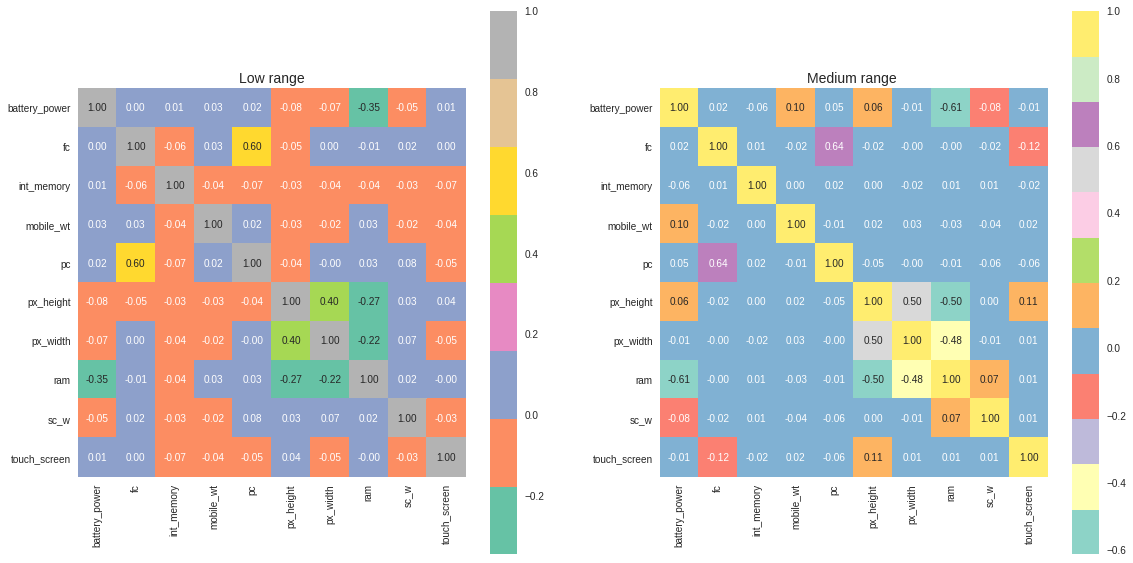

In [ ]:
x=df.drop(['clock_speed','m_dep','n_cores','sc_h','talk_time','wifi','blue','four_g','three_g','dual_sim'],axis=1)
p0=x.loc[x['price_range']==0].corr()
p1=x.loc[x['price_range']==1].corr()
p2=x.loc[x['price_range']==2].corr()
p3=x.loc[x['price_range']==3].corr()
p0=p0.drop(['price_range'],axis=1)
p1=p1.drop(['price_range'],axis=1)
p2=p2.drop(['price_range'],axis=1)
p3=p3.drop(['price_range'],axis=1)
p0=p0.drop(['price_range'],axis=0)
p1=p1.drop(['price_range'],axis=0)
p2=p2.drop(['price_range'],axis=0)
p3=p3.drop(['price_range'],axis=0)
plt.figure(figsize=(40,10))
plt.subplot(1,4,1)
plt.title('Low range', fontsize=14)
sns.heatmap(p0, annot=True, fmt='.2f', square=True, cmap = 'Set2')
plt.subplot(1,4,2)
plt.title('Medium range ', fontsize=14)
sns.heatmap(p1, annot=True, fmt='.2f', square=True, cmap = 'Set3')
plt.show()

#Inference:
 1. When the prices fall under the low range category, Pixel resolution and battery power **weakly and negatively** correlates to RAM, i.e., when the pixels are higher the RAM is smaller.
 2. When the prices fall under the medium range category, Pixel resolution and battery power **strongly and negatively** correlates to RAM, i.e., when the pixels and battery power are higher the RAM is smaller. 
 3. From the above points, it can be inferred that **low - medium range mobiles dont have large RAM but if they do, then the other specs of the mobile are in low quality to compensate the price.**



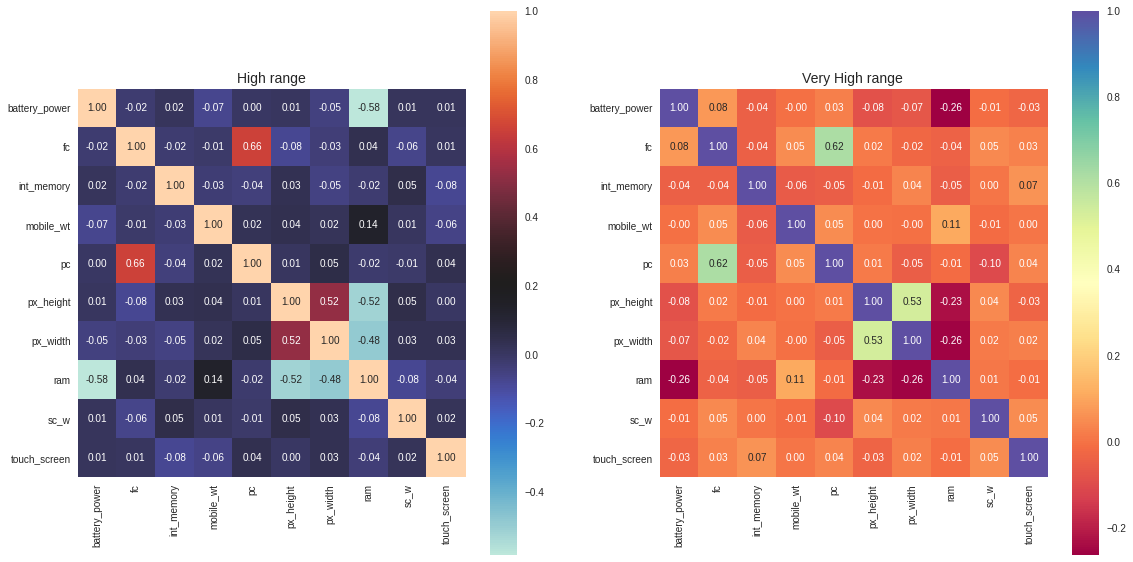

In [ ]:
plt.figure(figsize=(40,10))
plt.subplot(1,4,1)
plt.title('High range', fontsize=14)
sns.heatmap(p2, annot=True, fmt='.2f', square=True, cmap = 'icefire')
plt.subplot(1,4,2)
plt.title('Very High range ', fontsize=14)
sns.heatmap(p3, annot=True, fmt='.2f', square=True, cmap = 'Spectral')
plt.show()

#Inference:
When compared to the high range mobiles, the very high mobile range comparatively has a weak influence between RAM and other specs indicating that as the prices increase, there is no compensation and no attribues have a heavy influence on other attributes.

#Graphical Univariate Analysis

Histograms are one of the most common graphs used to display numeric data. Histograms two important things we can learn from a histogram:

* distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
* To identify outliers — Extremely low or high values that do not fall near any other data points.

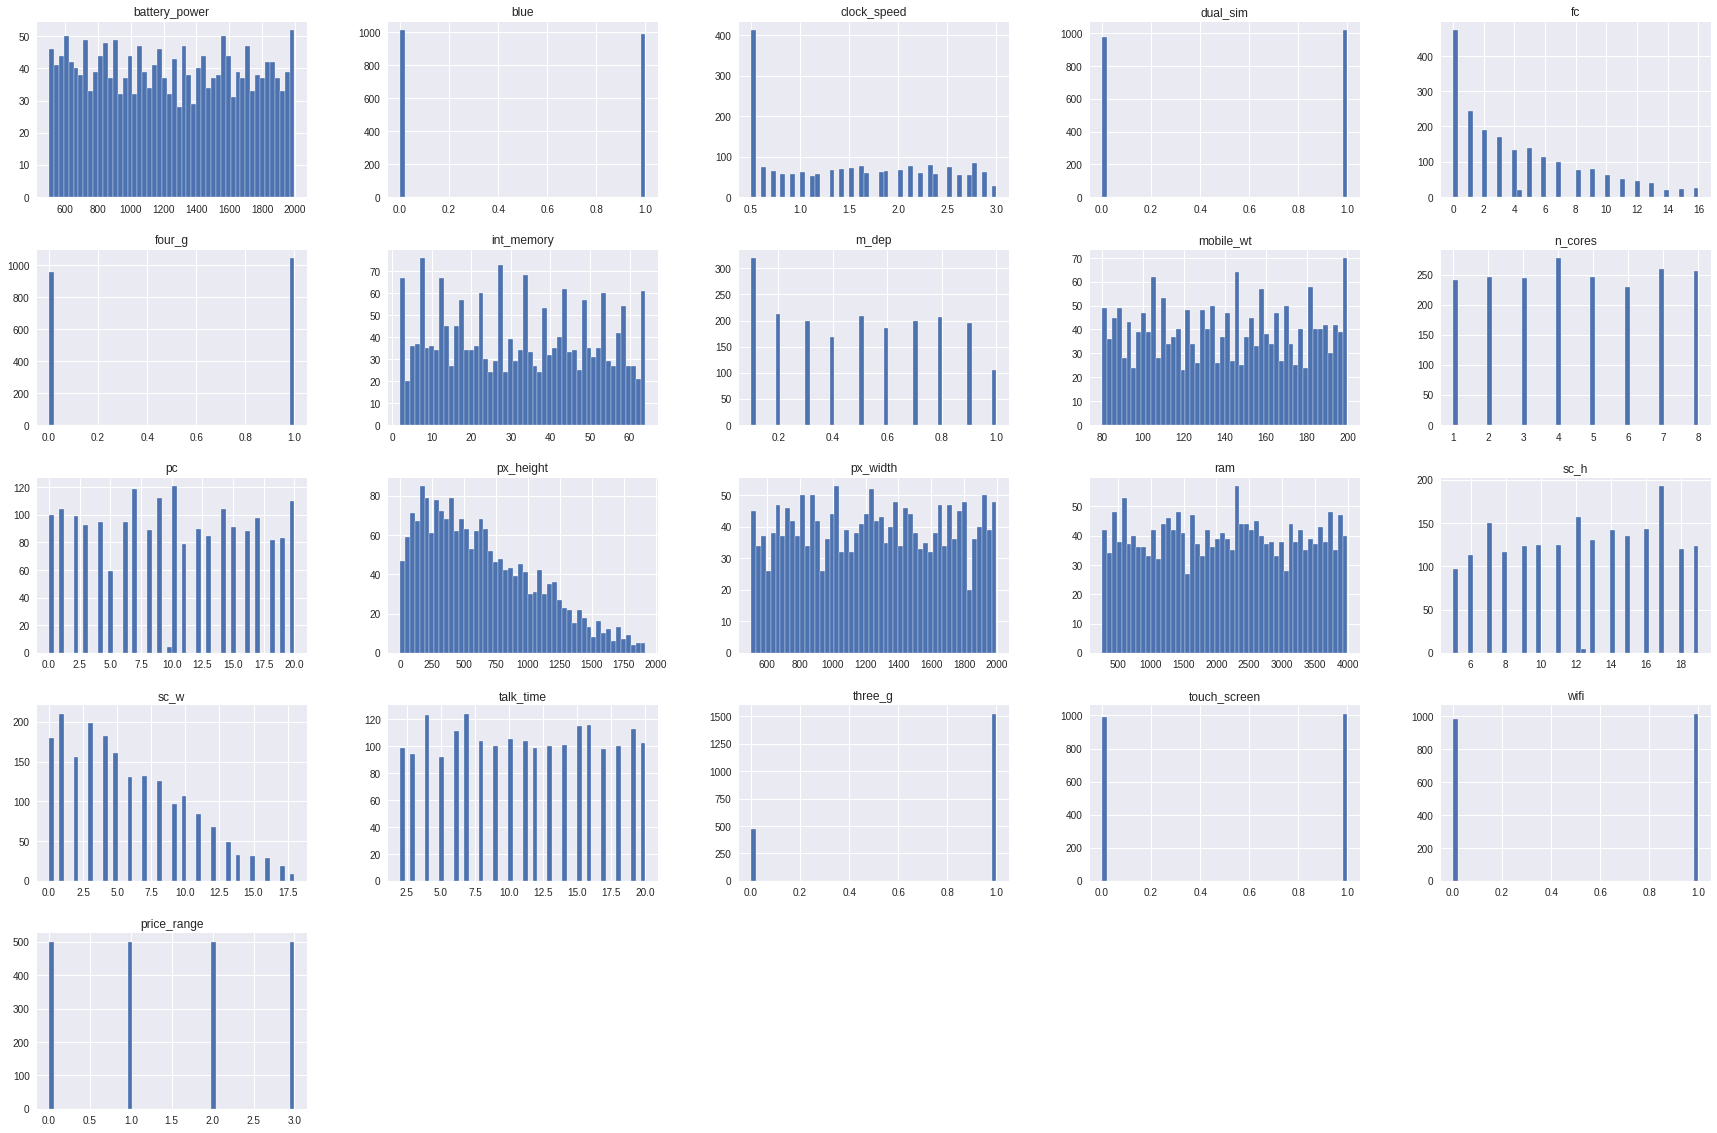

In [ ]:
df.hist(bins=50,figsize=(30,20))
plt.show();

**Boxplot**

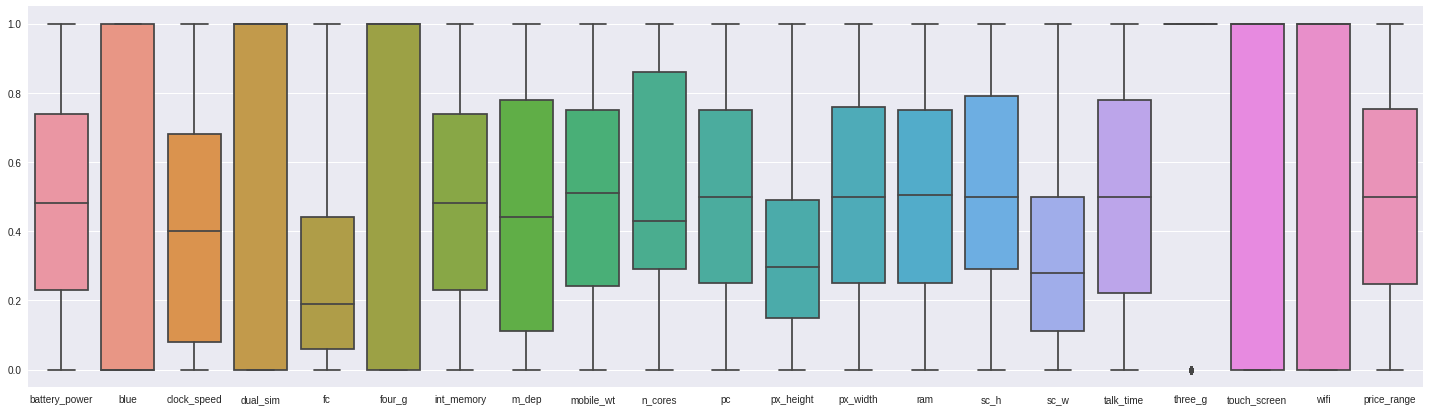

In [ ]:
plt.figure(figsize=(25,7))
sns.boxplot(data=train);

Most of the attribute of the normalized dataset are under normal distribution.

**Inference:**
1. The median of battery power is around 0.5.
2. 3G attribute assumes the 0's to be outliers, that is the reason the range is absolved to zero. This is because there are more phones with 3G as shown in the previous histogram.
3. The 75th percentile of core processor lies around 0.8.
4. The 25th percentile of talk time lies around 0.2.



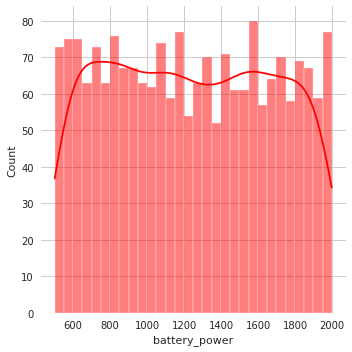

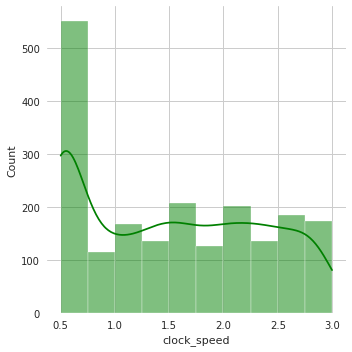

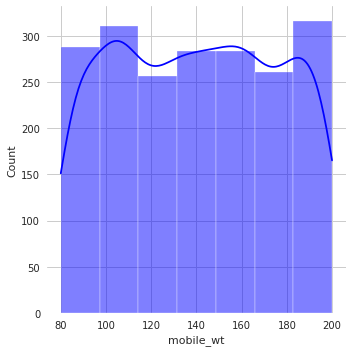

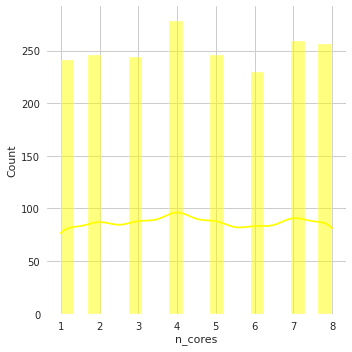

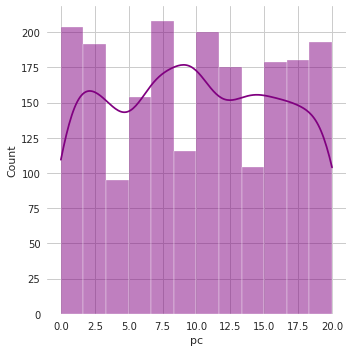

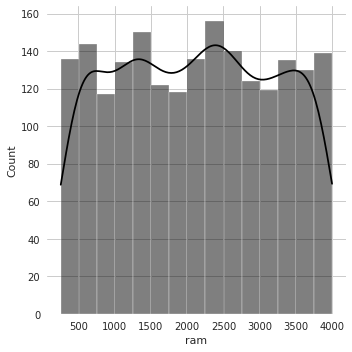

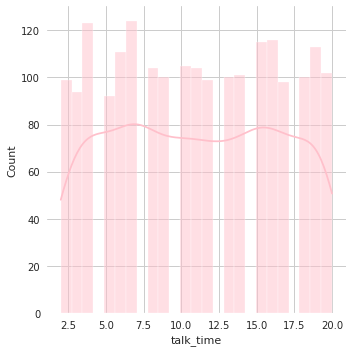

In [ ]:
sns.set_style('whitegrid')
sns.displot(df['battery_power'], kde = True, color ='red', bins = 30)
sns.displot(df['clock_speed'], kde = True, color ='green', bins = 10)
sns.displot(df['mobile_wt'], kde = True, color ='blue', bins = 7)
sns.displot(df['n_cores'], kde = True, color ='yellow', bins = 20)
sns.displot(df['pc'], kde = True, color ='purple', bins = 12)
sns.displot(df['ram'], kde = True, color ='black', bins = 15)
sns.displot(df['talk_time'], kde = True, color ='pink', bins =25)
plt.show();

**Inference:**

From the above dist plot,
This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.
 
It shows the count of various attributes.

#Bivariate Analysis

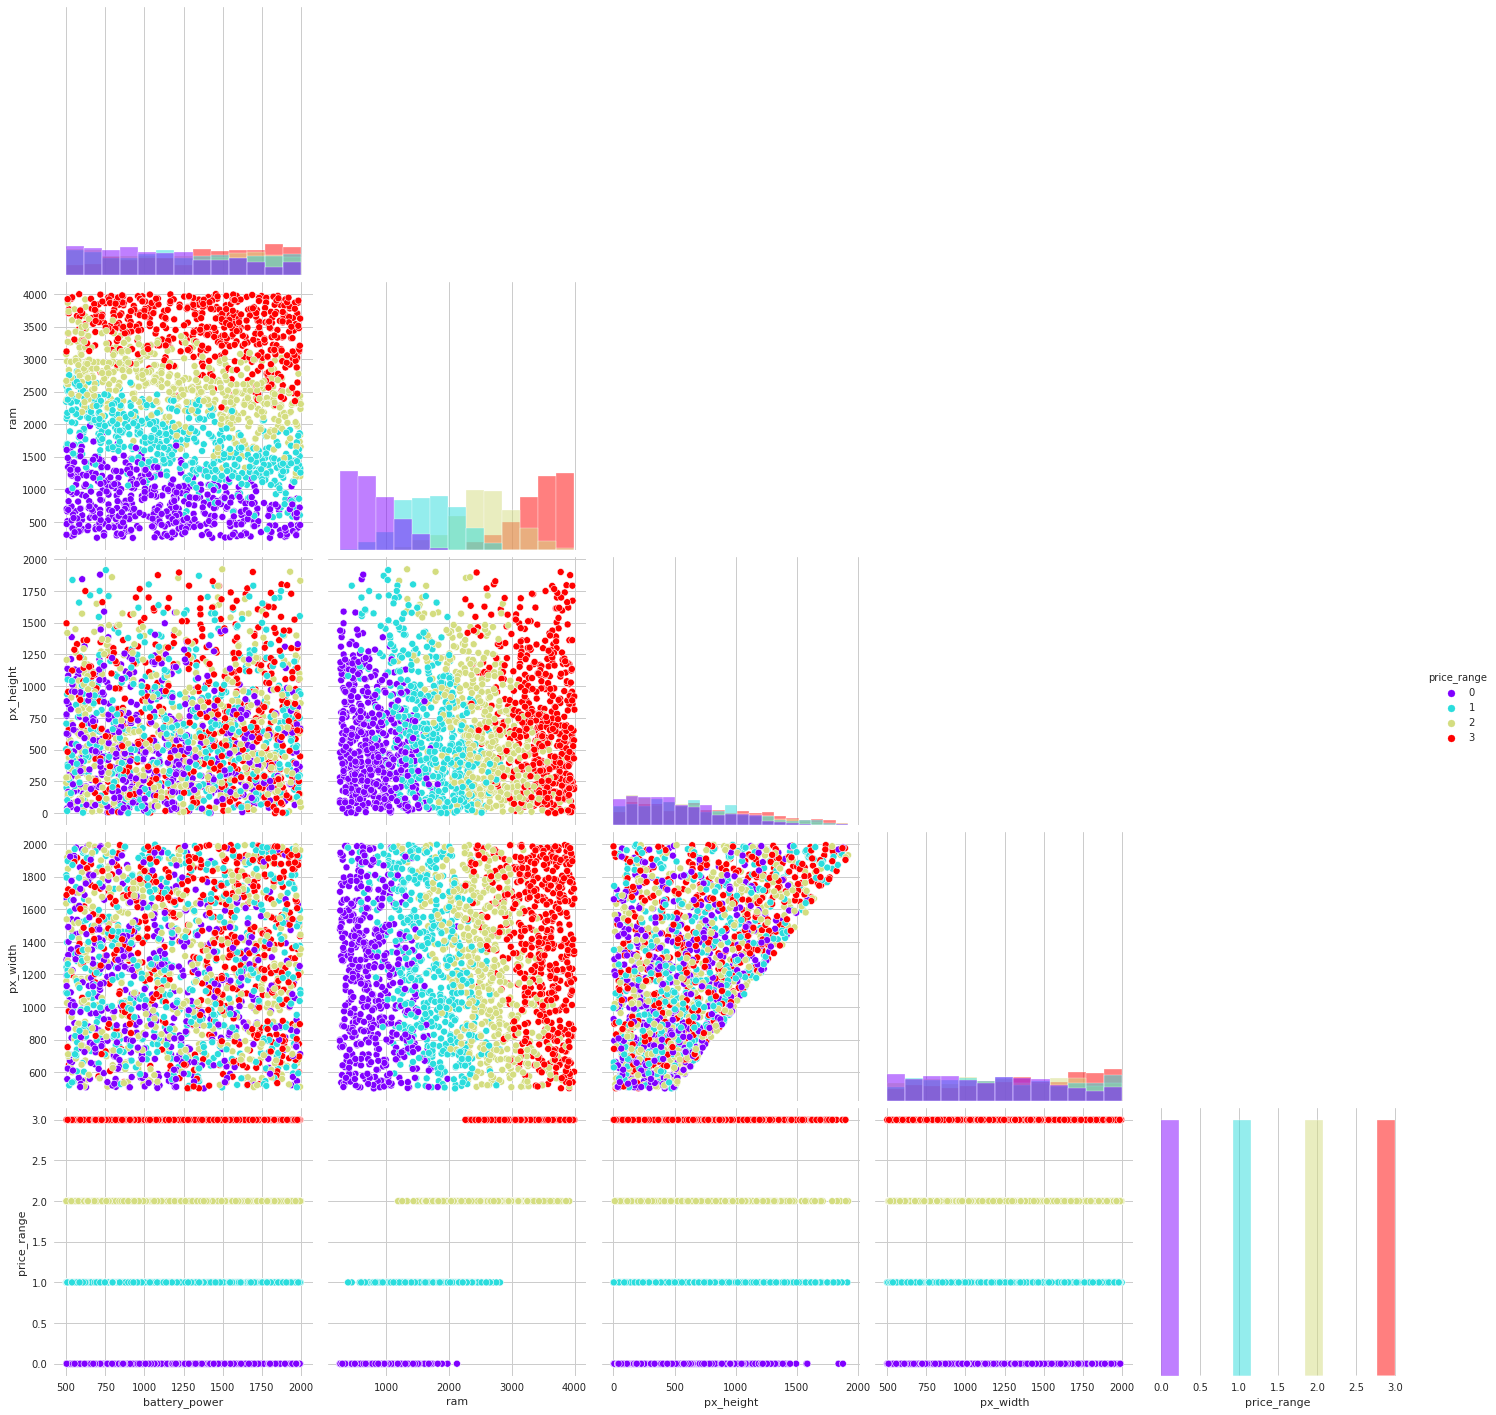

In [ ]:
sns.pairplot(df,hue='price_range',palette='rainbow',corner=True, vars=['battery_power','ram','px_height','px_width','price_range'],height=4,diag_kind="hist");

#Inference:

From the pair plot,
1. RAM size lies between 2GB to 4GB for very high range mobile.
2. Low model mobiles have 500 MB to 1500 MB RAM.
3. As the RAM memory increases, the pixel resolution increases by low to very high range.

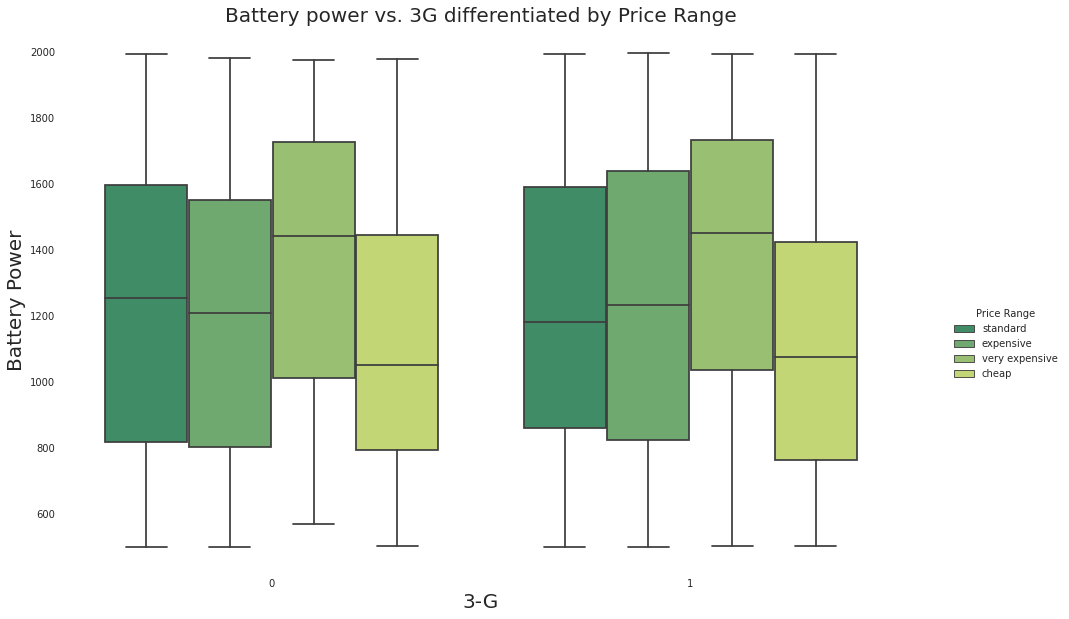

In [ ]:
sns.set_style("white")
range_mapping = {0: "cheap",
    1: "standard",
    2: "expensive",
    3: "very expensive"}
df['price_range_mapped'] = df['price_range'].map(range_mapping)
plt.figure(figsize = (15,10))
sns.boxplot(x="three_g", y="battery_power", hue = "price_range_mapped", data = df,palette='summer')
plt.title("Battery power vs. 3G differentiated by Price Range", fontsize=20)
plt.xlabel("3-G", fontsize = 20)
plt.ylabel("Battery Power", fontsize = 20)
plt.legend(title='Price Range',bbox_to_anchor=(1.2,0.5))

plt.show()

**Inference:**

From the box plot,
1. Battery power remains the same irrespective of whether the phone has 3G or not.

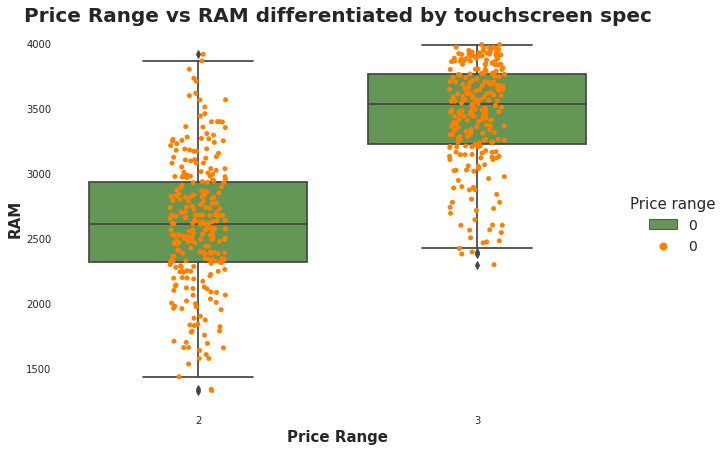

In [ ]:
plt.figure(figsize=(10,7))
df2=df.loc[((df['touch_screen']==0)&((df['price_range']==2)|(df['price_range']==3))),'battery_power':'price_range']
sns.boxplot(data=df2,x='price_range',y='ram',palette='gist_earth',hue='touch_screen')
sns.stripplot(data=df2,x='price_range',y='ram',palette='autumn',hue='touch_screen')
plt.title('Price Range vs RAM differentiated by touchscreen spec',fontweight='bold',fontsize=20)
plt.ylabel("RAM" ,fontweight='bold',fontsize=15)
plt.xlabel("Price Range",fontweight='bold',fontsize=15)
plt.legend(title='Price range',bbox_to_anchor=(1.2, 0.59),fontsize=14,title_fontsize=15)
plt.show()

**Inference**

From the box plot and strip plot,
1. There are mobile phones which are expensive but do not have touchscreen capability.
2.  The outliers are due to the fact that when comparing the price range to the RAM, there are values of RAM greater than the expected range of the price of the mobile.
3. As the price goes higher, the RAM size increases too.

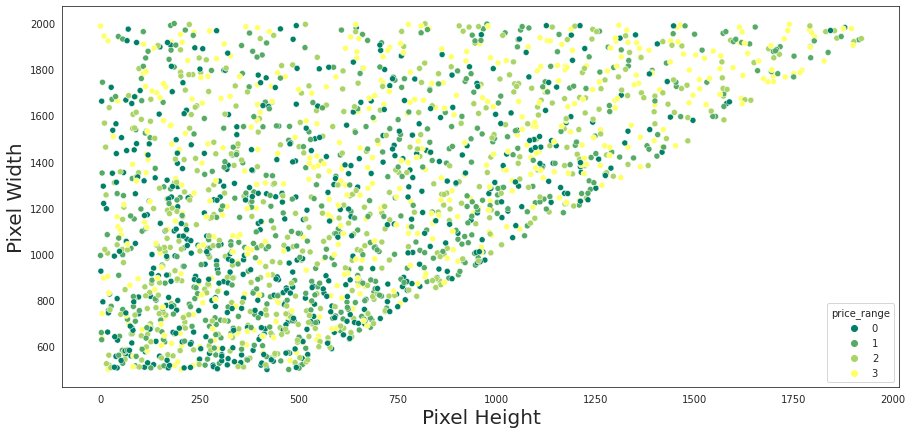

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="px_height",y="px_width",data=df,hue='price_range',palette='summer')
plt.xlabel("Pixel Height",size=20)
plt.ylabel("Pixel Width",size=20)
plt.show()

**Inference:** 

From the scatter plot,
1. As the pixel resolution height increases the width increases proportionally.
2. No mobile phone has high height with low width.

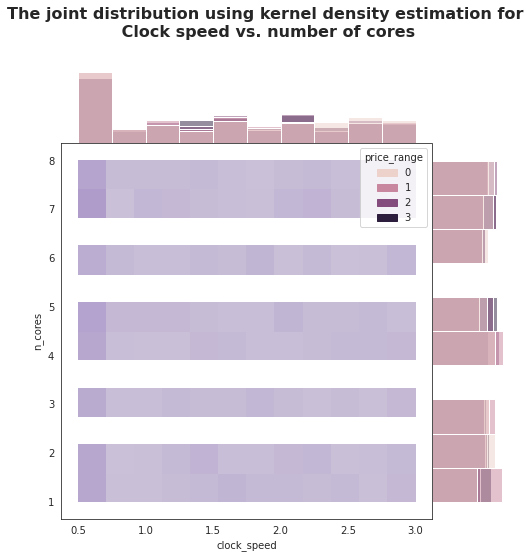

In [ ]:
sns.jointplot(data=df,x='clock_speed',y='n_cores',hue='price_range' ,kind="hist", height=7,color='blue', space=0, marginal_kws={'bins':10})
plt.suptitle('The joint distribution using kernel density estimation for\n Clock speed vs. number of cores',position=(0.5,1.1),fontweight='bold',fontsize=16)
plt.show()

**Inference:**

From the join plot,
1. The choice of bins for computing and plotting a histogram can exert substantial influence on the insights that one is able to draw from the visualization. If the bins are too large, they may erase important features. On the other hand, bins that are too small may be dominated by random variability, obscuring the shape of the true underlying distribution.
2. This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate.
3. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate

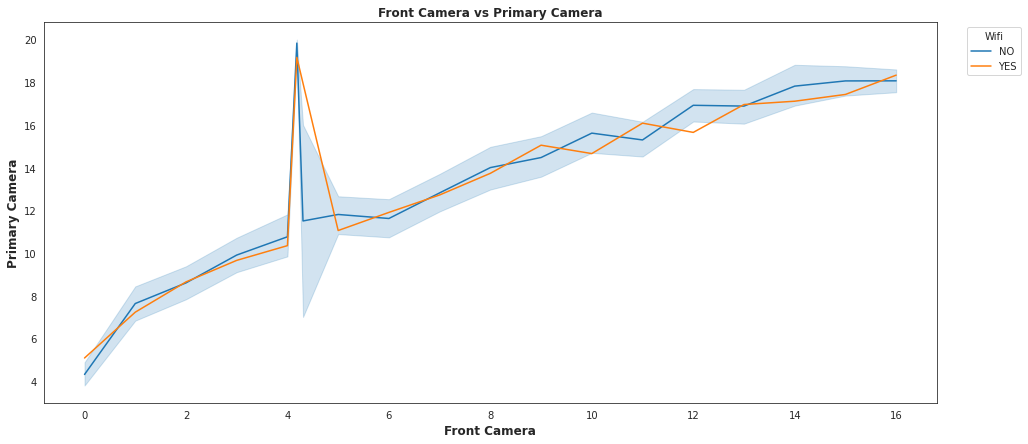

In [ ]:
w0 = df.loc[df['touch_screen']==0,:]
w1 = df.loc[df['touch_screen']==1,:]
plt.figure(figsize=(16,7))
plt.title("Front Camera vs Primary Camera",fontweight='bold',fontsize=12)
lp_wifi0 = sns.lineplot(x = 'fc' , y = 'pc' , data = w0,ci=90)
plt.xlabel('Front Camera',fontweight='bold',fontsize=12)
plt.ylabel('Primary Camera',fontweight='bold',fontsize=12)
lp_wifi1 = sns.lineplot(x = 'fc' , y = 'pc' , data = w1,ci=None)
leg1 = plt.legend(['NO','YES'],title='Wifi',bbox_to_anchor=(1.1,1))
plt.show()

**Inference:**

From the line plot,
1. The light colors depict the confidence intervals to draw when aggregating with an estimator.
2. Front Camera pixels increase with back camera pixels.
3. Both the attributes are positively corelated.

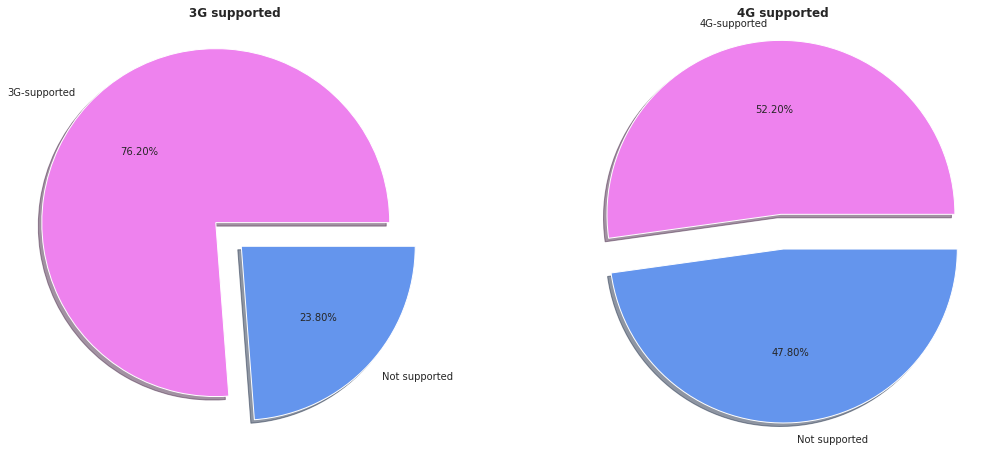

In [ ]:
values_3g = df["three_g"].value_counts()
values_4g = df["four_g"].value_counts()

labels4g = ["4G-supported",'Not supported']
labels3g = ["3G-supported",'Not supported']

f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ["violet", "cornflowerblue"]
explode = (0.15,0.05)
ax[0].pie(x= values_3g, autopct="%.2f%%",labels=labels3g, pctdistance=0.6,explode=explode,colors = colors, shadow=True, startangle=0)
ax[0].set_title('3G supported',fontweight='bold',fontsize=12);

ax[1].pie(x =values_4g,autopct="%.2f%%", labels=labels4g, pctdistance=0.6,explode=explode,colors = colors, shadow=True, startangle=0)
ax[1].set_title('4G supported',fontweight='bold',fontsize=12);

**Inference:**

From the pie chart,
1. 23.80 percent of the mobiles in the dataset doesnt support 3G.
2. 76.20 percent of the mobiles in the dataset support 3G.
3. 52.20 percent of the mobiles in the dataset support 4G.
4. 47.80 percent of the mobiles in the dataset doesnt support 4G.

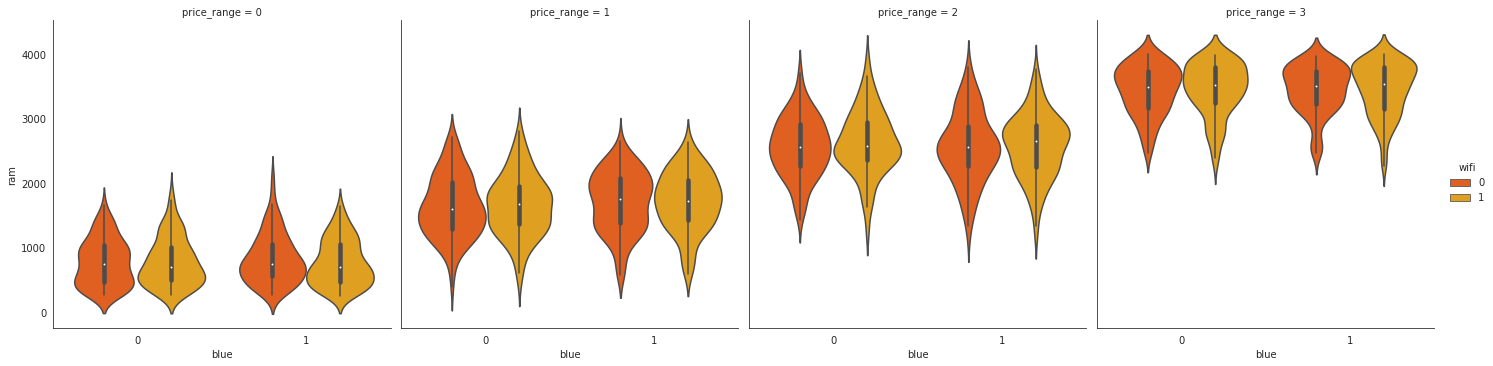

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.catplot('blue','ram',hue='wifi',col='price_range',data=df,palette='autumn', kind="violin", dodge=True,col_wrap=4);

**Inference**

From the violin plot,
1. Even some of the expensive phone don't have bluetooth.
2. A cheap phone which has bluetooth but not wifi has a meadian value of RAM around 800 MB.
3.An expensive phone that doesnt have wifi nor bluetooth has RAM range of 1000-4000 MB.

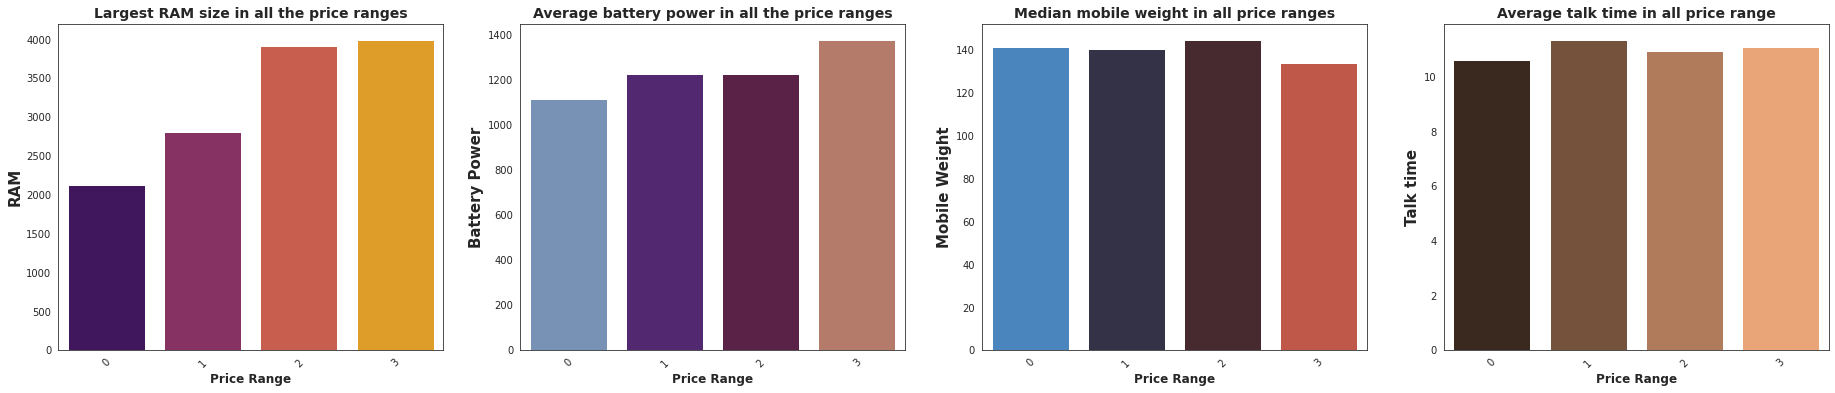

In [ ]:
plt.figure(figsize=(40,6))
plt.subplot(1,5,1)
top1=df.groupby('price_range')['ram'].max().to_frame().reset_index()
sns.barplot(y=top1.ram,x=top1.price_range,palette='inferno')
plt.xticks(rotation=45)
plt.xlabel("Price Range" ,fontweight='bold',fontsize=12)
plt.ylabel("RAM",fontweight='bold',fontsize=15)
plt.title('Largest RAM size in all the price ranges',fontweight='bold', fontsize=14)


plt.subplot(1,5,2)
top2=df.groupby('price_range')['battery_power'].mean().to_frame().reset_index()
sns.barplot(y=top2.battery_power,x='price_range',data=top2,palette='twilight')
plt.xticks(rotation=45)
plt.xlabel("Price Range" ,fontweight='bold',fontsize=12)
plt.ylabel("Battery Power",fontweight='bold',fontsize=15)
plt.title('Average battery power in all the price ranges',fontweight='bold', fontsize=14)

plt.subplot(1,5,3)
top3=df.groupby('price_range')['mobile_wt'].median().to_frame().reset_index()
sns.barplot(y=top3.mobile_wt,x='price_range',data=top3,palette='icefire')
plt.xticks(rotation=45)
plt.xlabel("Price Range" ,fontweight='bold',fontsize=12)
plt.ylabel("Mobile Weight",fontweight='bold',fontsize=15)
plt.title('Median mobile weight in all price ranges',fontweight='bold', fontsize=14)

plt.subplot(1,5,4)
top4=df.groupby('price_range')['talk_time'].mean().to_frame().reset_index()
sns.barplot(y=top4.talk_time,x='price_range',data=top4,palette='copper')
plt.xticks(rotation=45)
plt.xlabel("Price Range" ,fontweight='bold',fontsize=12)
plt.ylabel("Talk time",fontweight='bold',fontsize=15)
plt.title('Average talk time in all price range',fontweight='bold', fontsize=14)

plt.show()

**Inference:**

From the bar graph,
1. The mobile with the largest RAM ~ 4GB comes under the very expensive category.
2. The average battery power of a cheap phone is around 1100 mAh.
3. The expensive category has the median mobile weight as 140g.
4. Average talk time is around 10 hours in all the categories.


#Regression
1. Multiple
2. Linear
3. Gradient Descent

In [ ]:
dff=train

**1. Multiple Regression (OLS method)** (Hard coded)

In [ ]:
dff['1']=1
dff.head()

battery_power  blue  clock_speed  ...  wifi  price_range  1
0           0.23   0.0         0.68  ...   1.0         0.33  1
1           0.35   1.0         0.00  ...   0.0         0.67  1
2           0.04   1.0         0.00  ...   0.0         0.67  1
3           0.08   1.0         0.80  ...   0.0         0.67  1
4           0.88   1.0         0.28  ...   0.0         0.33  1

[5 rows x 22 columns]

In [ ]:
X = dff.iloc[:,[21,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]] 
y = dff.iloc[:,20]  

In [ ]:
X_transpose=X.transpose()
X_transpose=X_transpose.values
X=np.array(X)
X_new=np.matmul(X_transpose,X)
new_X= np.linalg.inv(X_new)
mul_X= np.matmul(new_X,X_transpose)
b=np.matmul(mul_X,y)
print("Coefficients: ", b)

Coefficients:  [-3.37561738e-01  2.53621064e-01 -1.00187631e-03 -1.11965860e-02
 -6.77829072e-03  6.23696915e-03  5.35816427e-04  1.96041366e-02
 -4.33731135e-03 -3.44379130e-02  5.82395648e-03 -1.27059486e-03
  1.76871332e-01  1.38832154e-01  1.18384993e+00  4.32840116e-03
 -1.14477433e-03  4.17097865e-03  9.01038651e-03 -1.96438748e-03
 -6.47037217e-03]


In [ ]:
dff['yPredicted']=(b[0]+b[1]*dff['battery_power']+b[2]*dff['blue']+b[3]*dff['clock_speed']+b[4]*dff['dual_sim']+b[5]*dff['fc']+b[6]*dff['four_g']+b[7]*dff['int_memory']+b[8]*dff['m_dep']+
                   b[9]*dff['mobile_wt']+b[10]*dff['n_cores']+b[11]*dff['pc']+b[12]*dff['px_height']+b[13]*dff['px_width']+b[14]*dff['ram']+b[15]*dff['sc_h']+b[16]*dff['sc_w']+
                   b[17]*dff['talk_time']+b[18]*dff['three_g']+b[19]*dff['wifi'])

In [ ]:
meanc=dff['price_range'].mean()

dff['Unexplained']=(dff['price_range']-dff['yPredicted'])**2
dff['explained']=(dff['yPredicted']-meanc)**2
dff['total']=dff['Unexplained']+dff['explained']

In [ ]:
ssr=dff['explained'].sum()
sst=dff['total'].sum()
sse=dff['Unexplained'].sum()

In [ ]:
print('SSR',ssr)
print('SST',sst)
print('SSE',sse)

SSR 255.85695906527377
SST 278.9856767472845
SSE 23.12871768201069


1. SSR - The second term is the sum of squares due to regression, or SSR. It is the sum of the differences between the predicted value and the mean of the dependent variable. 

2. SST - The sum of squares total, denoted SST, is the squared differences between the observed dependent variable and its mean. 

3. SSE - The last term is the sum of squares error, or SSE. The error is the difference between the observed value and the predicted value.

In [ ]:
r2=ssr/sst
print('Co-efficient of determination in multiple linear regression',round(r2,4))

Co-efficient of determination in multiple linear regression 0.9171


R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

**Inference**

Since r^2 is near to 1, the created model has predicted values close to actual values thereby proving that the model is best fitted.

**2. Linear Regression** (Package)

**Test train split:**
The train dataset is split into 80:20 ratio as train and test set.

In [ ]:
#All the attributes
'''
X = dff.iloc[:,[21,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]] 
y = dff.iloc[:,20]  

r^2=0.9145
'''

#Only strongly corelated attributes
X = dff.iloc[:,[21,0,11,12,13]] 
y = dff.iloc[:,20] 

#r^2=0.9237

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [ ]:
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
  y_pred = regressor.predict(X_test)
  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_test, y_pred)
  rmse=np.sqrt(mse)
  r2_score = regressor.score(X_test, y_test)
  print("RMSE=",round(rmse,4))
  print("Co-efficient of determination=",round(r2_score,4))

RMSE= 0.1056
Co-efficient of determination= 0.9237


**Residual Plot**

Text(0, 0.5, 'Residuals')

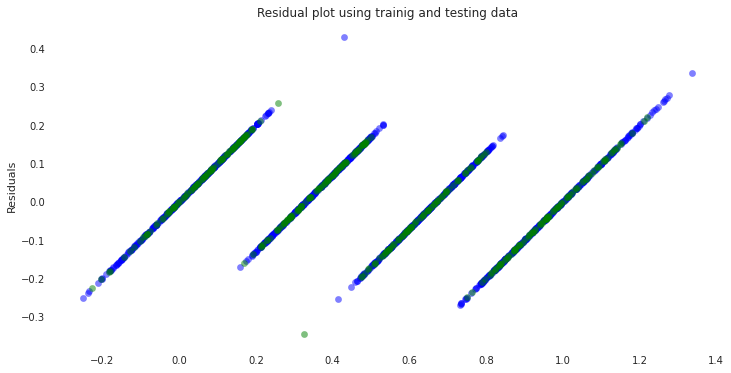

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(regressor.predict(X_train),regressor.predict(X_train)-y_train,c='b',s=40,alpha=0.5)
plt.scatter(regressor.predict(X_test),regressor.predict(X_test)-y_test,c='g',s=40,alpha=0.5)
plt.title("Residual plot using trainig and testing data")
plt.ylabel('Residuals')

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

**RAM vs Price range** (Hard coded)

In [ ]:
a=train['ram'].values
b=train['price_range'].values
mean_x = np.mean(a)
mean_y = np.mean(b)
n= len(a)
numer = 0
denom = 0
for i in range(n):
      numer += (a[i] - mean_x) * (b[i] - mean_y)
      denom += (a[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
print("b1=",b1)
print("b0=", b0)

b1= 1.1821276088705632
b0= -0.09024813638516083


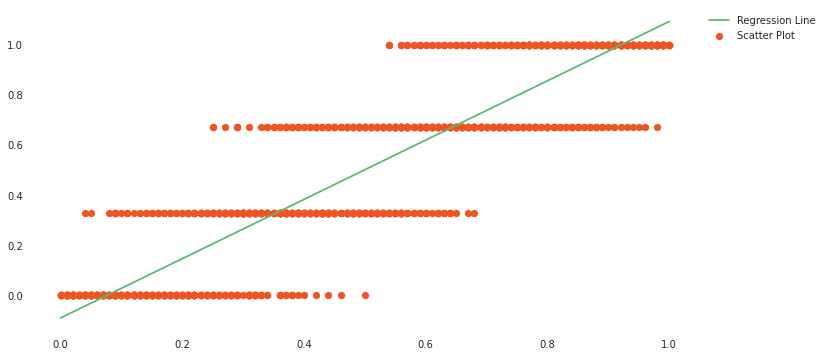

In [ ]:
plt.figure(figsize=(12,6))
X, Y = a,b
max_x = np.max(X)
min_x = np.min(X)
x = np.linspace(min_x, max_x) 
y = b0 + b1 * x
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = round(np.sqrt(rmse/n),3)
print("RMSE=",rmse)

RMSE= 0.149


In [ ]:
sst = 0
sse = 0
for i in range(n):
        y_pred = b0 + b1 *X[i]
        sst+= (Y[i] - mean_y)**2
        sse+= (Y[i] - y_pred)**2
r2 = 1-(sse/sst)
print('SSE',sse)
print(sst)
print("Co-efficient of determination=",r2)

Co-efficient of determination= 0.84052197580336


**3. Gradient Descent** (Hard coded)

In [ ]:
import math
X=dff['ram'].values
y=dff['price_range'].values
m_current=0 
b_current=0 
epochs=1000
learning_rate=0.0001
N = float(len(y))
for i in range(epochs):
          y_current = (m_current * X) + b_current
          MSE = sum([data**2 for data in (y-y_current)]) / N
          RMSE= math.sqrt(MSE)
          MAE= sum([data for data in abs(y-y_current)]) / N
          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
print("Slope=",round(m_current,4))
print("Bias=",round(b_current,4))
print("MSE=",round(MSE,4))
print("RMSE=",round(RMSE,4))
print("MAE=",round(MAE,4))

Slope= 0.063
Bias= 0.0876
MSE= 0.2725
RMSE= 0.522
MAE= 0.4293


1. MSE-the mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

2. RMSE - Square root of MSE

3. MAE - it is simply the average absolute vertical or horizontal distance between each point in a scatter plot and the Y=X line. In other words, MAE is the average absolute difference between X and Y.

In [ ]:
n_rows = train.shape[0]

In [ ]:
X=train['ram'].to_numpy().reshape(n_rows,1)
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=train['price_range'].to_numpy().reshape(n_rows,1)

In [ ]:
X.shape, y.shape

((2000, 2), (2000, 1))

In [ ]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    m = len(y)
    J=0
    theta=theta.reshape(2,1)
    h_x = np.dot(X,theta)
    error_term = sum((h_x - y)**2)
    loss = error_term/(2*m)   #Half of MSE
    return loss

In [ ]:
compute_cost(X,y)

array([0.194725])

In [ ]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        term_vector = np.array([[term0],[term1]])
        theta = theta - term_vector.reshape(2,1)
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%%time
num_iterations=1500
theta_init=np.array([[1],[1]])
alpha=0.01
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 7.18 s, sys: 18.9 ms, total: 7.2 s
Wall time: 7.25 s


In [ ]:
theta

array([[0.02757021],
       [0.96178635]])

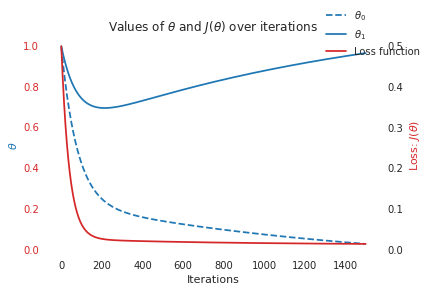

In [ ]:
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();


In [ ]:
%%time
# theta range
theta0_vals = np.linspace(-10,0,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 15.9 s, sys: 60.4 ms, total: 16 s
Wall time: 16 s


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,width=600, height=600, xaxis_title='theta0',yaxis_title='theta1')
fig.show()

#**KNN**

**KNN - Hard Coded**

In [ ]:
# dataset
df_classification = train
df_classification.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0           0.23   0.0         0.68  ...           0.0   1.0         0.33
1           0.35   1.0         0.00  ...           1.0   0.0         0.67
2           0.04   1.0         0.00  ...           1.0   0.0         0.67
3           0.08   1.0         0.80  ...           0.0   0.0         0.67
4           0.88   1.0         0.28  ...           1.0   0.0         0.33

[5 rows x 21 columns]

In [ ]:
# splitting features and target variables
x = df_classification.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]] 
y = round(df_classification.iloc[:,20]*3)  

In [ ]:
x.head()

battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
0           0.23   0.0         0.68  ...      0.0           0.0   1.0
1           0.35   1.0         0.00  ...      1.0           1.0   0.0
2           0.04   1.0         0.00  ...      1.0           1.0   0.0
3           0.08   1.0         0.80  ...      1.0           0.0   0.0
4           0.88   1.0         0.28  ...      1.0           1.0   0.0

[5 rows x 20 columns]

In [ ]:
y.head()

0    1.0
1    2.0
2    2.0
3    2.0
4    1.0
Name: price_range, dtype: float64

In [ ]:
# splitting train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
# Storing the dataset as list for further processing in the KNN - model
# List for storing needed features in a list for train_set1
Row_list_train =[] 
# List for storing class labels in a list for train_set1
label_train=[]

# append the train set each row values as list
Row_list_train = x_train.values.tolist()
# append the train set each class labels as list 
label_train = y_train.values.tolist()
    
train_list=np.array(Row_list_train)

# List for storing needed features in a list for test_set1
Row_list_test =[] 
# List for storing class labels in a list for test_set1
label_test=[]

# append the test set each row values as list
Row_list_test = x_test.values.tolist()
    
# append the train set each class labels as list 
label_test = y_test.values.tolist()

test_list=np.array(Row_list_test)

In [ ]:
# KNN Model 
# calculating no.of rows and columns in test and train dataset
train_rows = np.shape(train_list)[0]
train_columns = np.shape(train_list)[1]
test_rows = np.shape(test_list)[0]
test_columns = np.shape(test_list)[1]  
    
# Function for calculating euclidean distance between 2 np arrays
def euclidean_distance(x,y):
    return np.linalg.norm(x-y)


# Function to predict price_range
def predict_price_range(k,train_list,test_list): 
    
    # List to store the predicted price_range
    price_range_predicted=[]
    # List to store the actual price_range
    price_range_actual=[]

    for i in range(0,test_rows):
        # dictionary for storing count of each class labels (0,1,2 and 3) in k nearest neighbour {price_range_class : count}
        maximum_votes_class={}
        # considering each row of test set for calculating euclidean distance
        y1=test_list[i,:]
        # dictionary for storing euclidean distance for each tuple of train dataset {index no : euclidean distance}
        nearest_neighbour_distance={}       
        for j in range(0,train_rows):
            # considering each row of train set for each test set data for calculating euclidean distance
            x1=train_list[j,:]
            nearest_neighbour_distance[j]=euclidean_distance(x1,y1)
        # sort the neighbours according to the euclidean distance
        nearest_neighbour_sorted=sorted(nearest_neighbour_distance.items(), key=lambda v: v[1])
        # Initilaizing count of each class as 0
        maximum_votes_class[0]=0
        maximum_votes_class[1]=0
        maximum_votes_class[2]=0
        maximum_votes_class[3]=0
        # considering k nearest neighbour 
        for m in range(0,k):
            maximum_votes_class[label_train[nearest_neighbour_sorted[m][0]]]+=1
        # checking which class is more and updating count_correct_prediction in case of correct prediction
        mcl = sorted(maximum_votes_class.items(),key = lambda v : (v[1],v[0]),reverse=True)
        max_class_label = mcl[0][0]
        price_range_predicted.append(max_class_label)
        price_range_actual.append(int(label_test[i]))
        
    return price_range_predicted,price_range_actual

# Function for predicting accuracy for different k values ranging from 1 to sqrt(test_rows)
def accuracy_knn(k,price_range_predicted,price_range_actual):
    # variable to calculate no of correct predictions to calculate accuracy
    count_correct_predictions=0
    for i in range(0,test_rows):
        if(price_range_predicted[i]==price_range_actual[i]):
            count_correct_predictions+=1
    # printing accuracy for the model
    accuracy = (count_correct_predictions/test_rows)*100
    print("\nAccuracy of the ",k,"NN model is : ",accuracy)
    return accuracy

In [ ]:
# Prediction and accuracy
# Dictionary to find the accuracy for different k values of knn model
accuracy_of_models={}
# Setting the k value bound which sqrt of total training samples
k1=int(m.sqrt(train_rows))
# Checking whether the bound id odd and making it odd by adding 1 number if it is even so ytaht it is easy to predict
if(k1%2==0):
    k1+=1
# Calling the predict and accuracy functions
for k in range(1,k1,2):
    price_range_predicted,price_range_actual=predict_price_range(k,train_list,test_list)
    accuracy_of_models[accuracy_knn(k,price_range_predicted,price_range_actual)]=k


Accuracy of the  1 NN model is :  40.25

Accuracy of the  3 NN model is :  38.75

Accuracy of the  5 NN model is :  38.0

Accuracy of the  7 NN model is :  41.25

Accuracy of the  9 NN model is :  42.75

Accuracy of the  11 NN model is :  44.75

Accuracy of the  13 NN model is :  45.75

Accuracy of the  15 NN model is :  44.75

Accuracy of the  17 NN model is :  45.25

Accuracy of the  19 NN model is :  47.25

Accuracy of the  21 NN model is :  47.75

Accuracy of the  23 NN model is :  47.75

Accuracy of the  25 NN model is :  50.74999999999999

Accuracy of the  27 NN model is :  49.25

Accuracy of the  29 NN model is :  49.0

Accuracy of the  31 NN model is :  50.24999999999999

Accuracy of the  33 NN model is :  50.0

Accuracy of the  35 NN model is :  52.0

Accuracy of the  37 NN model is :  50.24999999999999

Accuracy of the  39 NN model is :  49.25


In [ ]:
# Finding maximum accuracy and the k value
print("Maximum accuracy is for",accuracy_of_models[max(accuracy_of_models)],"NN model and the accuracy is : ")
print(max(accuracy_of_models),"%")

Maximum accuracy is for 35 NN model and the accuracy is : 
52.0 %


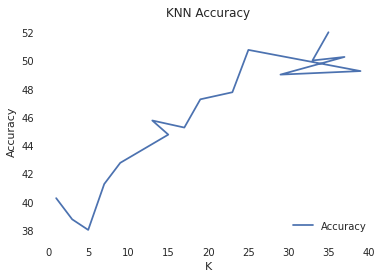

In [ ]:
# Plot showing the accuracy for eack k chosen
# setting the x - coordinates 
x = np.array(list(accuracy_of_models.values()))
# setting the corresponding y - coordinates 
y = np.array(list(accuracy_of_models.keys())) 
  
# potting the points 
plt.plot(x, y) 
# setting labels
plt.ylabel("Accuracy") 
plt.xlabel("K") 
plt.title("KNN Accuracy") 
plt.legend(["Accuracy"], loc ="lower right") 
# function to show the plot 
plt.show()

**KNN using package**

In [ ]:
# Prediction and accuracy using package
# Dictionary to find the accuracy for different k values of knn model
accuracy_of_models={}
# Setting the k value bound which sqrt of total training samples
k1=int(m.sqrt(train_rows))
# Checking whether the bound id odd and making it odd by adding 1 number if it is even so ytaht it is easy to predict
if(k1%2==0):
    k1+=1
# Calling the predict and accuracy functions
for k in range(1,k1,2):
  # Using the package KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=k)  
  knn.fit(x_train,y_train)
  acc = knn.score(x_test,y_test)*100
  print("\nAccuracy of the ",k,"NN model is : ",acc)
  accuracy_of_models[acc]=k


Accuracy of the  1 NN model is :  40.25

Accuracy of the  3 NN model is :  39.25

Accuracy of the  5 NN model is :  41.25

Accuracy of the  7 NN model is :  40.25

Accuracy of the  9 NN model is :  43.5

Accuracy of the  11 NN model is :  44.0

Accuracy of the  13 NN model is :  46.75

Accuracy of the  15 NN model is :  45.0

Accuracy of the  17 NN model is :  46.25

Accuracy of the  19 NN model is :  47.5

Accuracy of the  21 NN model is :  46.25

Accuracy of the  23 NN model is :  49.25

Accuracy of the  25 NN model is :  49.75

Accuracy of the  27 NN model is :  48.5

Accuracy of the  29 NN model is :  49.75

Accuracy of the  31 NN model is :  49.25

Accuracy of the  33 NN model is :  50.74999999999999

Accuracy of the  35 NN model is :  52.0

Accuracy of the  37 NN model is :  52.0

Accuracy of the  39 NN model is :  51.24999999999999


In [ ]:
# Finding maximum accuracy and the k value
print("Maximum accuracy is for",accuracy_of_models[max(accuracy_of_models)],"NN model and the accuracy is : ")
print(max(accuracy_of_models),"%")

Maximum accuracy is for 37 NN model and the accuracy is : 
52.0 %


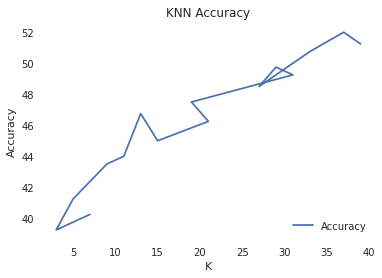

In [ ]:
# Plot showing the accuracy for eack k chosen
# setting the x - coordinates 
x = np.array(list(accuracy_of_models.values()))
# setting the corresponding y - coordinates 
y = np.array(list(accuracy_of_models.keys())) 
  
# potting the points 
plt.plot(x, y) 
# setting labels
plt.ylabel("Accuracy") 
plt.xlabel("K") 
plt.title("KNN Accuracy") 
plt.legend(["Accuracy"], loc ="lower right") 
# function to show the plot 
plt.show() 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=37)
df_knn=pd.read_csv('/content/drive/My Drive/dataset/mobile_price_analysis_train.csv')
knn.fit(x_train,y_train)
knn.score(x_test,y_test)
y_pred = knn.predict(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

In [ ]:
# Performance Evaluation Metrics
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

# Accuracy
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

# Precision, Recall and F1-score (Micro, Macro and weighted)
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# Classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[64 30 12  0]
 [27 49 24  1]
 [ 6 23 46 12]
 [ 1 10 46 49]]

Accuracy: 0.52

Micro Precision: 0.52
Micro Recall: 0.52
Micro F1-score: 0.52

Macro Precision: 0.56
Macro Recall: 0.52
Macro F1-score: 0.52

Weighted Precision: 0.57
Weighted Recall: 0.52
Weighted F1-score: 0.53

Classification Report

              precision    recall  f1-score   support

     Class 0       0.65      0.60      0.63       106
     Class 1       0.44      0.49      0.46       101
     Class 2       0.36      0.53      0.43        87
     Class 3       0.79      0.46      0.58       106

    accuracy                           0.52       400
   macro avg       0.56      0.52      0.52       400
weighted avg       0.57      0.52      0.53       400



Text(0.5, 48.29999999999998, 'Predicted label')

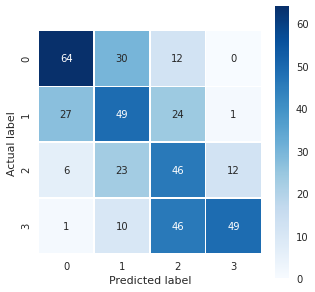

In [ ]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#AUC score
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred,pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
lb = LabelBinarizer()
lb.fit(y_test)
y_test1 = lb.transform(y_test)
y_pred = lb.transform(y_pred)
# auc score
auc_score = roc_auc_score(y_test1,y_pred,average="macro")
print('AUC score : ',auc_score)

AUC score :  0.680921845687271


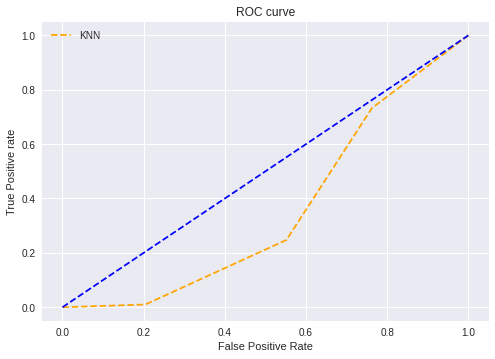

In [ ]:
# ROC curve
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#**Inference**
1. Accuracy of the KNN model is low (52%) for this given dataset.
2. Accuracy is maximum for the k value 37.
3. Though True Positives and True Negatives are more in number compared to False Positives and False Negatives, But there is not a huge margin between them.
4. But the AUC score is 0.68 stating the data is separable to a good extent (68%).

#**Naive Bayes**

**Naive Bayes hard coded**

In [ ]:
# Reference from Geeks for geeks 

# Group the data rows under each class yes or
# no in dictionary eg: dict[yes] and dict[no]
def groupUnderClass(mydata):
	dict = {}
	for i in range(len(mydata)):
		if (mydata[i][-1] not in dict):
			dict[mydata[i][-1]] = []
		dict[mydata[i][-1]].append(mydata[i])
	return dict

# Calculating Mean
def mean(numbers):
	return sum(numbers) / float(len(numbers))

# Calculating Standard Deviation
def std_dev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
	return math.sqrt(variance)

def MeanAndStdDev(mydata):
  info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
	# eg: list = [ [a, b, c], [m, n, o], [x, y, z]]
	# here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3
	# delete summaries of last class
  del info[-1]
  return info

# find Mean and Standard Deviation under each class
def MeanAndStdDevForClass(mydata):
	info = {}
	dict = groupUnderClass(mydata)
	for classValue, instances in dict.items():
		info[classValue] = MeanAndStdDev(instances)
	return info

# Calculate Gaussian Probability Density Function
def calculateGaussianProbability(x, mean, stdev):
	expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
	return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo

# Calculate Class Probabilities
def calculateClassProbabilities(info, test):
	probabilities = {}
	for classValue, classSummaries in info.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, std_dev = classSummaries[i]
			x = test[i]
			probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
	return probabilities

# Make prediction - highest probability is the prediction
def predict(info, test):
	probabilities = calculateClassProbabilities(info, test)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel

# returns predictions for a set of examples
def getPredictions(info, test):
	predictions = []
	for i in range(len(test)):
		result = predict(info, test[i])
		predictions.append(result)
	return predictions

# Accuracy score
def accuracy_rate(test, predictions):
	correct = 0
	for i in range(len(test)):
		if test[i][-1] == predictions[i]:
			correct += 1
	return (correct / float(len(test))) * 100.0

# driver code

# load the file and store it in mydata list
mydata = pd.concat([x_train,y_train], axis=1, join='inner')
mydata = mydata.values.tolist()
for i in range(len(mydata)):
	mydata[i] = [float(x) for x in mydata[i]]

# prepare model
info = MeanAndStdDevForClass(mydata)

# test model
test_data = pd.concat([x_test,y_test], axis=1, join='inner')
test_data = test_data.values.tolist()
predictions = getPredictions(info,test_data)
accuracy = accuracy_rate(test_data, predictions)
print("Accuracy of the model is: ", accuracy,"%")

Accuracy of the model is:  82.5 %


**Naive Bayes using package**

In [ ]:
# Naive Bayes using package
gnb = GaussianNB()
gnb.fit(x_train,y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(x_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Gaussian Naive Bayes model accuracy is ")
print(accuracy,"%")

Gaussian Naive Bayes model accuracy is 
82.25 %


In [ ]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

# Accuracy
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

# Precision, Recall and F1-score (Micro, Macro and Weighted)
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# Classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[99  7  0  0]
 [ 7 67 27  0]
 [ 0 13 66  8]
 [ 0  0  9 97]]

Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.82
Macro Recall: 0.82
Macro F1-score: 0.82

Weighted Precision: 0.83
Weighted Recall: 0.82
Weighted F1-score: 0.82

Classification Report

              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93       106
     Class 1       0.77      0.66      0.71       101
     Class 2       0.65      0.76      0.70        87
     Class 3       0.92      0.92      0.92       106

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



Text(0.5, 48.29999999999998, 'Predicted label')

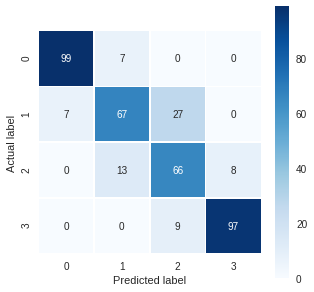

In [ ]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# AUC score
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred,pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
lb = LabelBinarizer()
lb.fit(y_test)
y_test1 = lb.transform(y_test)
y_pred = lb.transform(y_pred)
# auc scores
auc_score = roc_auc_score(y_test1,y_pred,average="macro")
print(auc_score)

0.8797647019189048


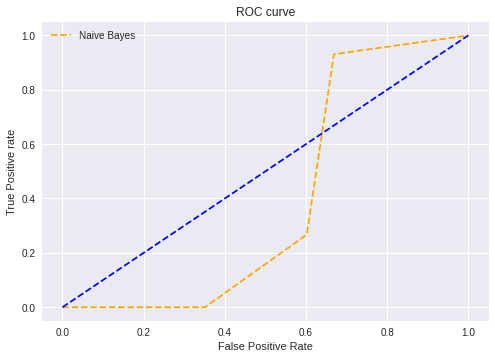

In [ ]:
# ROC curve
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#**Inference**
1. Accuracy of the Naive Bayes model is good (82.25%) for this given dataset.
2. Gaussian Distribution is being used.
3. True Positives and True Negatives are more in number compared to False Positives and False Negatives, And there is also a huge margin between them.
4. The AUC score is 0.88 stating the data is separable to a good extent (88%).

#**Decision Tree**

**Decision Tree using package**

Classifier

In [ ]:
# Classification using gini index
dtree_model = DecisionTreeClassifier(criterion = "gini",max_depth = 14).fit(x_train, y_train)
y_pred = dtree_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Decision tree model accuracy is ")
print(accuracy,"%")

Decision tree model accuracy is 
81.5 %


In [ ]:
# Classification using entrophy
dtree_model = DecisionTreeClassifier(criterion = "entropy",max_depth = 14).fit(x_train, y_train)
y_pred = dtree_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Decision tree model accuracy is ")
print(accuracy,"%")

Decision tree model accuracy is 
85.0 %


Regressor

In [ ]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',feature_names =['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']) 

In [ ]:
# Converting the dot file to png file
!dot -Tpng tree.dot -o tree.png

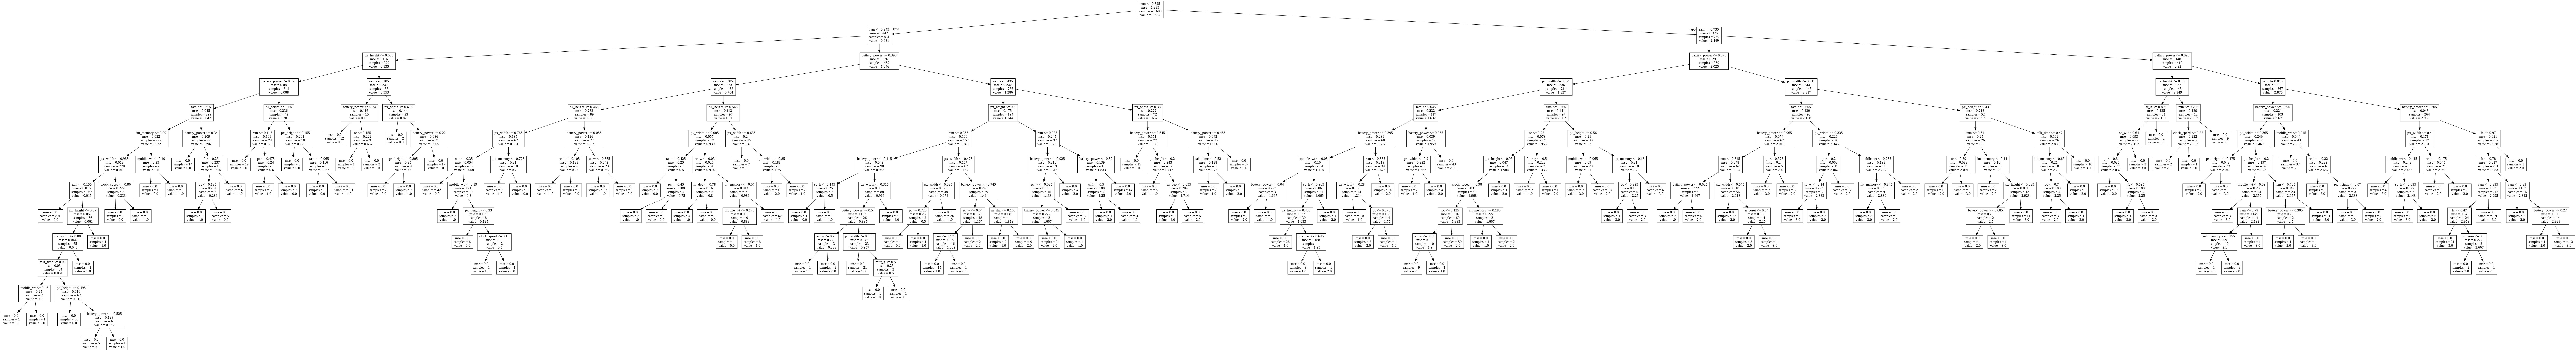

In [ ]:
# Generated Decision tree image
Image(filename = 'tree.png')

In [ ]:
y_pred = regressor.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Decision tree model accuracy is ")
print(accuracy,"%")

Decision tree model accuracy is 
87.25 %


In [ ]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

# Accuracy
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

# Precision, Recall, F1-score (Micro, Macro and Weighted)
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# Classification report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[99  7  0  0]
 [ 8 83 10  0]
 [ 0  7 74  6]
 [ 0  0 13 93]]

Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.88
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93       106
     Class 1       0.86      0.82      0.84       101
     Class 2       0.76      0.85      0.80        87
     Class 3       0.94      0.88      0.91       106

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



Text(0.5, 48.29999999999998, 'Predicted label')

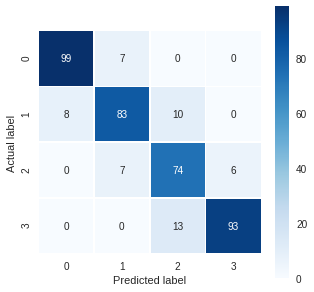

In [ ]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# AUC score
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred,pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
lb = LabelBinarizer()
lb.fit(y_test)
y_test1 = lb.transform(y_test)
y_pred = lb.transform(y_pred)
# auc scores
auc_score = roc_auc_score(y_test1,y_pred,average="macro")
print(auc_score)

0.9144691784211877


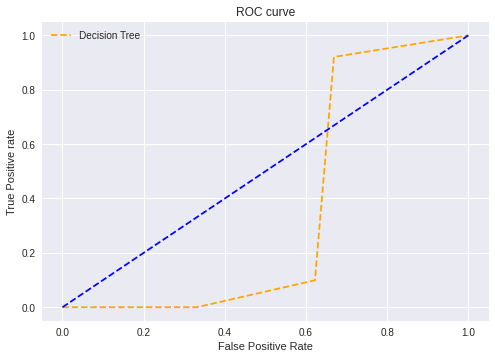

In [ ]:
# ROC curve
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#**Inference**
1. Accuracy of the Decision tree model is very good (87.25%) for this given dataset.
2. Accuracy is more (by 1%) when we consider entrophy as criterion as compared to gini index
3. True Positives and True Negatives are more in number compared to False Positives and False Negatives, And also there is a huge margin between them.
4. But the AUC score is 0.91 stating the data is separable to a very good extent (91%).

#SVM

In [ ]:
df2=df

In [ ]:
y = df2["price_range"].values
from sklearn import preprocessing
x_data=df2.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

**checking how the classes are splitted**

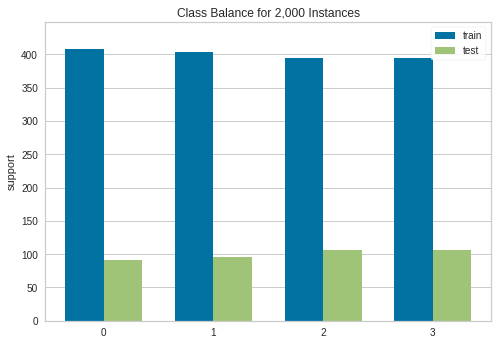

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.97
test accuracy: 0.8275


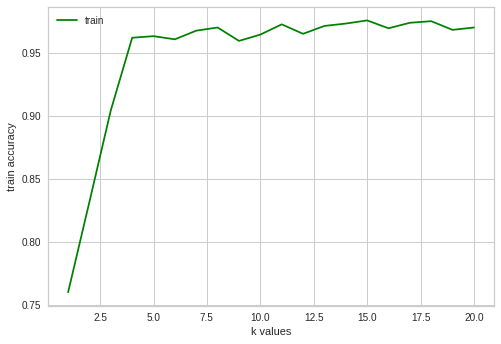

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

**In the graph above, we can see 4 or 5 features gives higher train accuracies.**

In [ ]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.975625
max accuracy id: 14


In [ ]:
print(" max accuracy values: \n", df.iloc[4])

 max accuracy values: 
 best features number    5.000000
train_score             0.963125
Name: 4, dtype: float64


In [ ]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']
x test features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']


**using GridSearchCV method to tune parameters.**

In [ ]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf","poly","sigmoid"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [ ]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9625
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


**Building the model**

In [ ]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1, probability=True)

In [ ]:
svm_model.fit(x_new,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.96125
test_accuracy:  0.935


**SVM Performance**

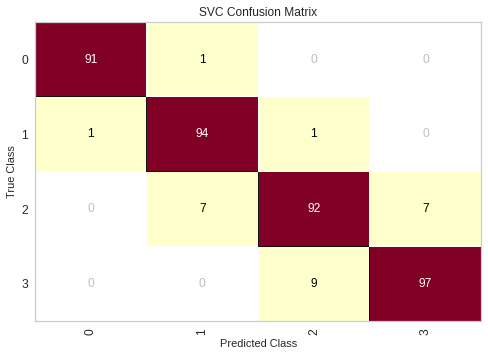

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(x_new, y_train)
cm.score(x_new_test, y_test)

cm.poof()

In [ ]:
y_pred=svm_model.predict(x_new_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.92      0.98      0.95        96
           2       0.90      0.87      0.88       106
           3       0.93      0.92      0.92       106

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.93      0.94      0.93       400



In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
lb = LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)
roc_auc_score(y_test, y_pred, average="macro")

0.9579912871752081

In [ ]:
y_pred=svm_model.predict(x_new_test)
svm_test=x_test[["battery_power","int_memory","px_height","px_width","ram"]]

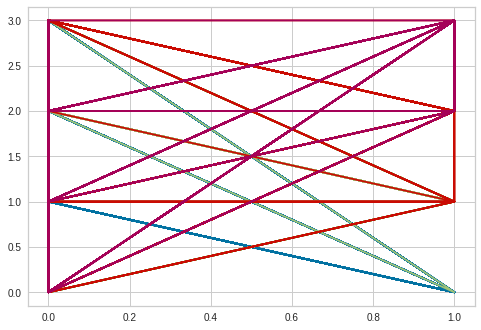

In [ ]:
plt.plot(y_test,y_pred);

In [ ]:
X = df2.drop('price_range',axis=1)
y = df2['price_range']
a,b,c,d = train_test_split(X,y,test_size = 0.33,random_state=42)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



<Figure size 720x720 with 0 Axes>

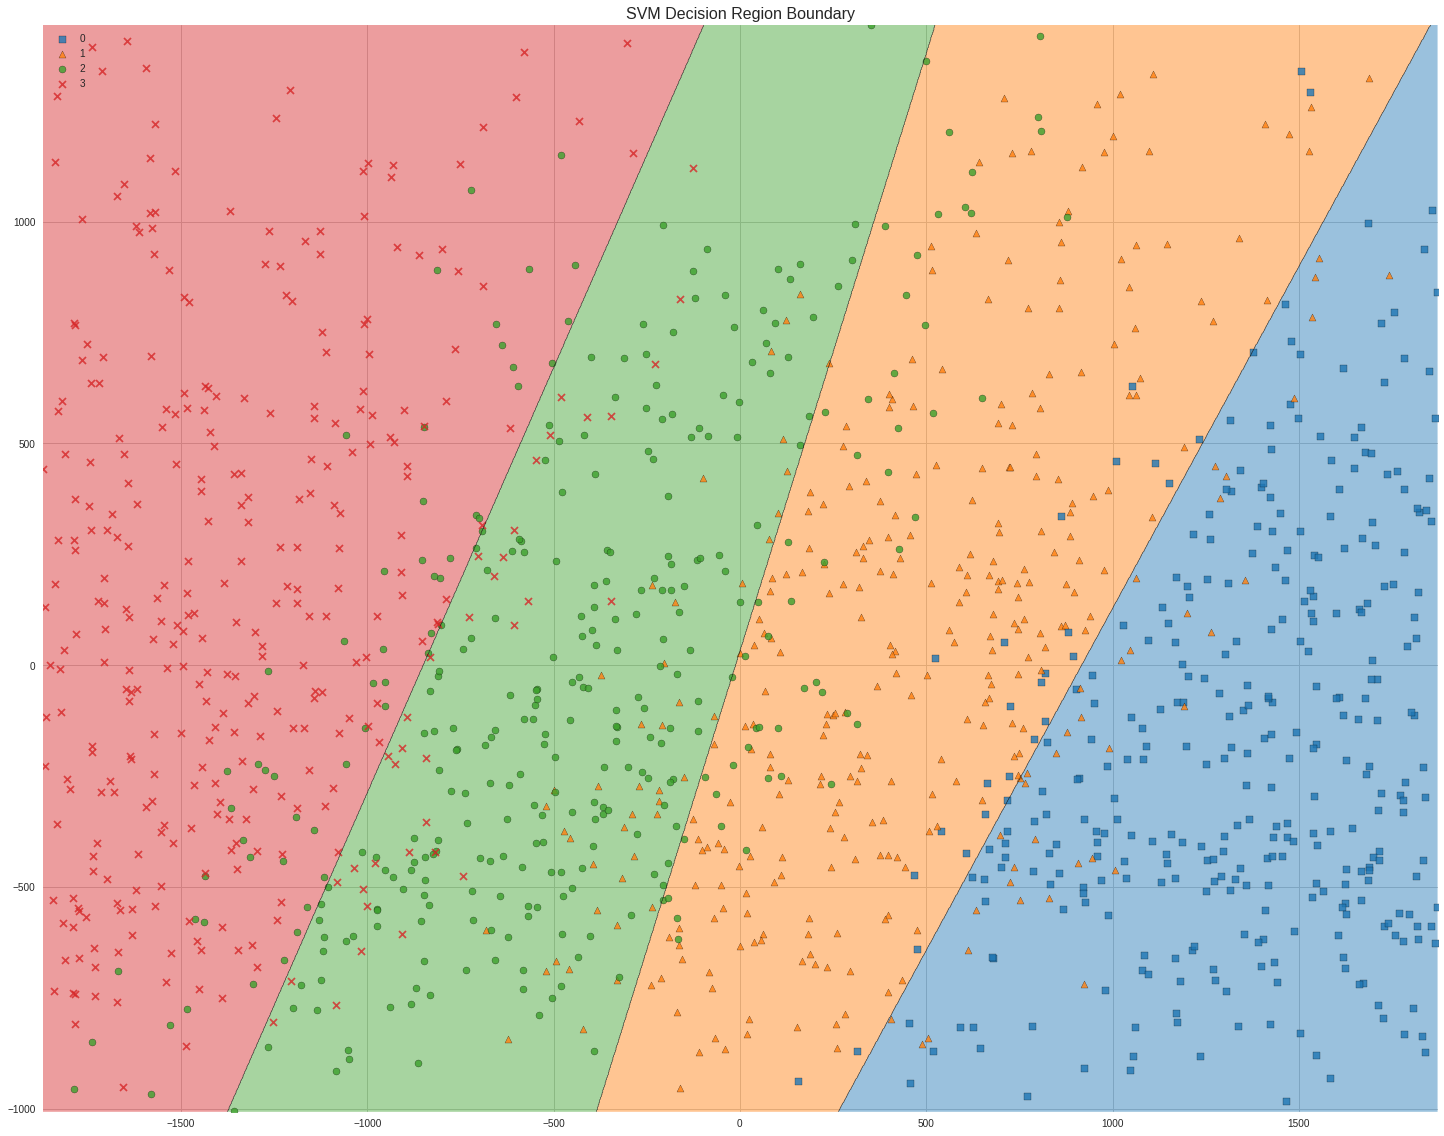

In [ ]:
plt.figure(figsize=(10,10))
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(kernel="linear",C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(a)
clf.fit(X_train2, c)
plt.figure(figsize=(25,20))
plot_decision_regions(X_train2, np.array(c), clf=clf, legend=2)
plt.title('SVM Decision Region Boundary', size=16);


**Inference**
1. After tuning parameters with GridsearchCV Linear kernel gave the best fit among linear,rbf,poly,sigmoid
2. The accuracy of svm with linear kernel is very good with about 94% of accuracy
3. The data is very well seperable since the aou is 0.95
4. It has good f1,recall and precision scores indicating that svm performed well for this dataset.



#LogisticRegression

**using sklearn package**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df3=df2

In [ ]:
X = df2.iloc[:,:-1].values
Y = df2.iloc[:,-1:].values
      
    # Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 1/3, random_state = 0 )

In [ ]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=logmodel.predict(x_test)

In [ ]:
score=logmodel.score(x_test,y_test)
print(score)

0.9


**hard coded**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
  
  
# Driver code
  
def main() :
      
    
    X = df2.iloc[:,:-1].values
    Y = df2.iloc[:,-1:].values
      
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y
      , test_size = 1/3, random_state = 0 )
      
    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
      
    model.fit( X_train, Y_train )    
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
      
    # measure performance    
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :            
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy with hard code      :  ", ( 
      correctly_classified1 / count ) * 100 )
    
  
  
if __name__ == "__main__" :     
    main()

Accuracy with hard code      :   65.06746626686657


**Logistic Regression Performance**

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[101   5   0   0]
 [  3  88  10   0]
 [  0   8  72   7]
 [  0   0   7  99]]


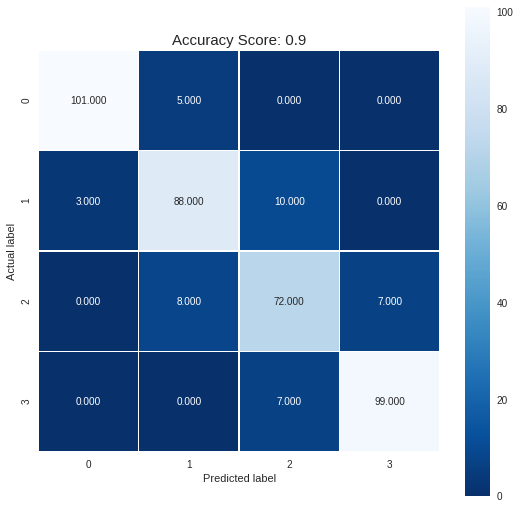

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score.round(2))
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       106
         1.0       0.87      0.87      0.87       101
         2.0       0.81      0.83      0.82        87
         3.0       0.93      0.93      0.93       106

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresh1 = roc_curve(d,pred,pos_label=1)
random_probs = [0 for i in range(len(d))]
p_fpr, p_tpr, _ = roc_curve(d, random_probs, pos_label=1)
lb = LabelBinarizer()
lb.fit(y_test)
y_test1 = lb.transform(d)
y_pred = lb.transform(pred)
# auc scores
auc_score = roc_auc_score(y_test1,y_pred,average="macro")

print(auc_score)

0.7545230819507126


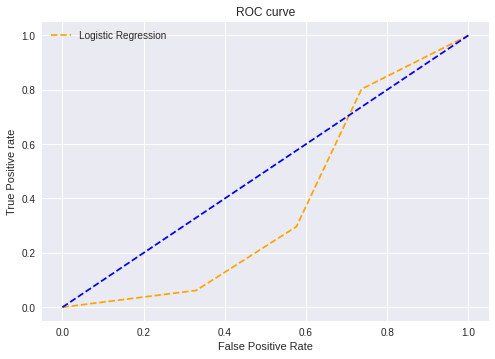

In [ ]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Inference**
 
1. The accuracy of Logistic Regression is very good , 0.90 
3. The data is seperable to a good extent cause the auc score is 0.75
4. It has high f1,recall and precision scores for this data
5. False positive and false negatives are less which is a good indication

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**using GridSearchCV method to tune parameters.**

In [ ]:
rf_parm = dict(n_estimators = [20, 30, 50, 70, 100, 150], max_features = [0.1, 0.2, 0.6, 0.9], 
               max_depth = [10,20,30],min_samples_leaf=[1,10,100, 400, 500, 600],random_state=[0])

In [ ]:
rc = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rc, param_grid = rf_parm)

In [ ]:
rf_grid.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
print("RF Best Score:", rf_grid.best_score_)
print("RF Best Parameters:", rf_grid.best_params_)

RF Best Score: 0.8904761904761905
RF Best Parameters: {'max_depth': 10, 'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 20, 'random_state': 0}


**Building Model**

In [ ]:
rc_best = RandomForestClassifier(n_estimators = 150,  max_features = 0.6, min_samples_leaf = 1, max_depth = 20, random_state = 0 )

In [ ]:
rc_best.fit(X_train, Y_train)
rc_tr_pred = rc_best.predict(X_train)
rc_val_pred = rc_best.predict(X_test)

In [ ]:
print(rc_val_pred)

[3 0 2 2 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 3 1 0 3 3 1 3 2 1 2 3 3 1 2 3 2 1 0
 1 3 2 2 2 2 3 3 3 0 0 0 2 0 2 3 1 3 2 1 0 3 3 3 0 3 1 2 3 1 3 2 2 3 2 3 3
 0 0 1 2 3 0 1 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 2 3 0 3 0 0
 2 0 1 1 1 1 3 1 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 2 2 3 3 0 2 2 3 0 2 1 0 1 3
 1 2 0 2 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 1 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 2 3 2 0 2 0 0 0 3 3 0 2 2 0 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 3 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 1 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 1 0
 1 2 0 3 1 2 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 3 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 1 0 1 2 3 0 0 1 3 0 3 0 1 2 1 1 0 3 1 0 1 3 0 3 3 0
 2 1 3 2 1 3 2 0 2 3 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 3 2 2 3 0 0
 1 2 0 2 0 3 3 0 2 3 0 2 2 1 0 2 2 1 3 2 2 0 2 0 3 3 2 1 0 3 0 2 0 0 1 3 0
 3 0 0 1 2 0 1 3 0 2 2 1 

**Performance of Random Forest**

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
print(classification_report(Y_test, rc_val_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       167
           1       0.87      0.87      0.87       150
           2       0.87      0.81      0.84       167
           3       0.91      0.95      0.93       183

    accuracy                           0.90       667
   macro avg       0.90      0.90      0.90       667
weighted avg       0.90      0.90      0.90       667



In [ ]:
cm = metrics.confusion_matrix(Y_test, rc_val_pred)
print(cm)

[[162   5   0   0]
 [  9 131  10   0]
 [  0  14 135  18]
 [  0   0  10 173]]


In [ ]:
print("Precision Score : ",precision_score(Y_test, rc_val_pred , 
                                           pos_label='positive',
                                           average='weighted'))
print("Recall Score : ",recall_score(Y_test, rc_val_pred , 
                                           pos_label='positive',
                                           average='weighted'))
print("F1 Score:",  f1_score(Y_test, rc_val_pred , 
                                           pos_label='positive',
                                           average='weighted'))

Precision Score :  0.9001740118749415
Recall Score :  0.9010494752623688
F1 Score: 0.9001699570883798


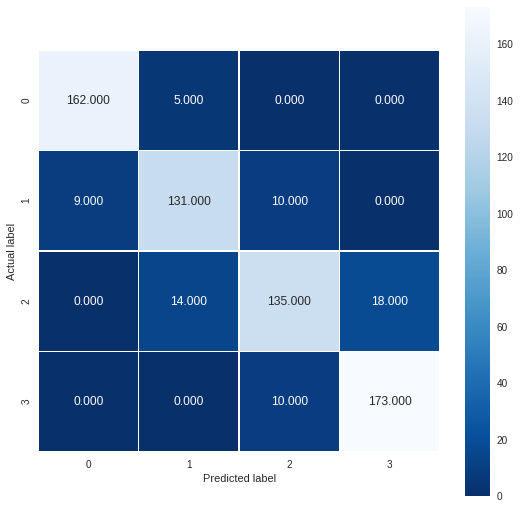

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


**Inference**
 
1. The accuracy of Random Forest  is 0.90 which is a very good accuracy
2. It has good f1,recall and precision scores which implies that the model fits well for the data set
3. False positive and false negatives are very less which is also a good indication of model performance

#Stochastic Gradient Descent (SGD)

**Hard Coded**

In [ ]:
X,y = df3.drop('price_range',axis=1),df3['price_range']

thetas = np.zeros(X.shape[1])

In [ ]:
def cost_function(X,Y,B):
    predictions = np.dot(X,B.T)
    
    cost = (1/len(Y)) * np.sum((predictions - Y) ** 2)
    return cost

In [ ]:
cost_function(X,y,thetas)

3.5

In [ ]:
X_norm = (X - X.min()) / (X.max() - X.min())
X = X_norm

In [ ]:
t0,t1 = 5,50 # learning schedule hyperparams
def learning_schedule(t):
    return t0/(t+t1)

In [ ]:
def stochastic_gradient_descent(X,y,theta,n_epochs=50):
    c_hist = [0] * n_epochs
    for epoch in range(n_epochs):
        for i in range(len(y)):
            rand_index = np.random.randint(len(y))
            ind_x = X[rand_index:rand_index+1]
            ind_y = y[rand_index:rand_index+1]

            gradients = 2 * ind_x.T.dot(ind_x.dot(theta) - ind_y)
            eta = learning_schedule(epoch * len(y) + i)
            theta = theta - eta * gradients
            c_hist[epoch] = cost_function(ind_x,ind_y,theta)
    return theta,c_hist

In [ ]:
th_n,cost_history = stochastic_gradient_descent(X,y,thetas)

In [ ]:
import math
MSE=mean_squared_error(np.dot(X,th_n.T),y)
RMSE= math.sqrt(MSE)
print("MSE",MSE)

MSE 0.12887666998740285


In [ ]:
print("RMSE:",RMSE)

RMSE: 0.35899396929113286


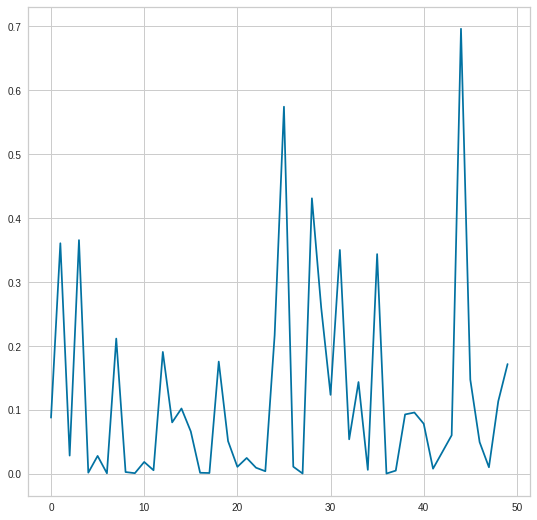

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(range(50),cost_history)
plt.show()

**Inference**
 
RMSE is 0.35 and MSE is 0.12 .So Stochastic Gradient Descent performed better than gradient descent since the errors are less
